<a href="https://colab.research.google.com/github/Typholly/Covid-DataExploratory/blob/main/ReAnalyzed_Project_Dataset_sliced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset Description


<div class="alert alert-block alert-success">
    <h2 style="text-align:  center">Heart Disease Prediction- Project Capstone</h2>
</div>

**The dataset includes 13 independent variables and 1 dependent variable, as follows:**

- **Independent Variables**  
    
1. **age**: age in years
2. **sex**: sex (1 = male; 0 = female)
3. **ChestPainType**: chest pain type
    - 0: typical angina
    - 1: atypical angina
    - 2: non-anginal pain
    - 3: asymptomatic
4. **RestingBP**: resting blood pressure (in mm Hg on admission to the hospital)
5. **Cholesterol**: serum cholestoral in mg/dl
6. **FastingBS**: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. **RestingECG**: resting electrocardiographic results
    - 0: normal
    - 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. **MaxHR**: maximum heart rate achieved
9. **ExerciseAngina**: exercise induced angina (1 = yes; 0 = no)
10. **Oldpeak**: ST depression induced by exercise relative to rest
11. **ST_Slope**: the slope of the peak exercise ST segment
    - 0: upsloping
    - 1: flat
    - 2: downsloping

- **Dependent Variable**  
    - **HeartDisease**: Heart Disease: Has Heart Disease (**1**) or Does not have Heart Disease (**0**)

In [ ]:
!pip install scikit-learn==1.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 33.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.2.0 requires scikit-learn>=1.2.2, but you have scikit-learn 1.2.0 which is incompatible.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from plotly.offline import iplot
import plotly.graph_objects as go
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
%matplotlib inline
sns.set_style('darkgrid')
sns.set_palette('Set2')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
heart_dbb = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/HeartDbb_UCI.csv')

In [ ]:
heart_dbb.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172.0,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156.0,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98.0,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108.0,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122.0,N,0.0,Up,0
5,39,M,NAP,120,223,0,Normal,170.0,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170.0,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142.0,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130.0,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120.0,N,0.0,Up,0


In [ ]:
# Slicing the age data to focus on the ages between 28 and 65
heart_db = heart_dbb[(heart_dbb['Age'] >= 28) & (heart_dbb['Age'] <= 65)]

# Display the first few rows of the filtered dataframe to verify the operation
heart_db.head(10)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172.0,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156.0,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98.0,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108.0,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122.0,N,0.0,Up,0
5,39,M,NAP,120,223,0,Normal,170.0,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170.0,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142.0,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130.0,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120.0,N,0.0,Up,0


# Data Cleaning & Pre Processing

In [ ]:
#checking the data types of the various attributes in the dataset
heart_db.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR             float64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [ ]:
#further analysis of the data types of the vairuos columns or attributes
heart_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836 entries, 0 to 835
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             836 non-null    int64  
 1   Sex             836 non-null    object 
 2   ChestPainType   836 non-null    object 
 3   RestingBP       836 non-null    int64  
 4   Cholesterol     836 non-null    int64  
 5   FastingBS       836 non-null    int64  
 6   RestingECG      836 non-null    object 
 7   MaxHR           836 non-null    float64
 8   ExerciseAngina  836 non-null    object 
 9   Oldpeak         836 non-null    float64
 10  ST_Slope        836 non-null    object 
 11  HeartDisease    836 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 78.5+ KB


In [ ]:
#checking the number of columns and rows of the dataset
heart_db.shape

(836, 12)

There are 836 rows and 12 columns.
Checking to see missing/null values

In [ ]:
heart_db.nunique() # checking the counts of unique values per column

Age                38
Sex                 2
ChestPainType       4
RestingBP          59
Cholesterol       126
FastingBS           2
RestingECG          3
MaxHR             104
ExerciseAngina      2
Oldpeak            44
ST_Slope            3
HeartDisease        2
dtype: int64

In [ ]:
heart_db.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

there are no missing or null values in dataset

In [ ]:
#Finding all columns that have ? as its value
cols_with_missing_values = heart_db.loc[: , (heart_db == '?').any()].columns
cols_with_missing_values

Index([], dtype='object')

In [ ]:
#Drop any duplicated data (rows) from the dataset
heart_db.drop_duplicates(inplace=True)
#checking duplicates
heart_db.duplicated().sum()


0

There were no duplicates in the data.

In [ ]:
heart_db.nunique() # checking the counts of unique values per column

Age                38
Sex                 2
ChestPainType       4
RestingBP          59
Cholesterol       126
FastingBS           2
RestingECG          3
MaxHR             104
ExerciseAngina      2
Oldpeak            44
ST_Slope            3
HeartDisease        2
dtype: int64

In [ ]:
# Displaying the unique values for each column to see if there are NAN or ? values
for column in heart_db.columns:
    unique_values = heart_db[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")

Unique values in column 'Age': [40 49 37 48 54 39 45 58 42 38 43 60 36 44 53 52 51 56 41 32 65 35 59 50
 47 31 46 57 55 63 34 33 61 29 62 28 30 64]
Unique values in column 'Sex': ['M' 'F']
Unique values in column 'ChestPainType': ['ATA' 'NAP' 'ASY' 'TA']
Unique values in column 'RestingBP': [140 160 130 138 150 120 110 136 115 100 124 113 125 145 112 132 118 170
 142 180 135 108 155 128 106  95 122  98 105 133 165 126 152 116 144 154
 134 104 139 131 141 178 137 146 158 123 102  96 143 172 156 114 127 101
 174 148 117 129 164]
Unique values in column 'Cholesterol': [289 180 283 214 195 223 237 208 207 284 211 204 234 273 196 201 248 267
 184 288 215 209 260 188 224 172 186 254 250 177 227 230 294 264 259 175
 216 233 205 245 194 270 213 253 277 202 297 225 246 265 182 218 268 206
 238 263 291 229 210 269 275 179 241 255 276 282 272 240 228 292 247 243
 279 198 249 190 185 290 212 231 222 235 187 266 287 251 285 280 192 193
 219 257 226 217 298 256 295 173 281 200 171 271 274 221 220 24

There are no "?" or NaN values

Further checking for missing values in data set

Text(0.5, 1.0, 'Missing Data Pattern')

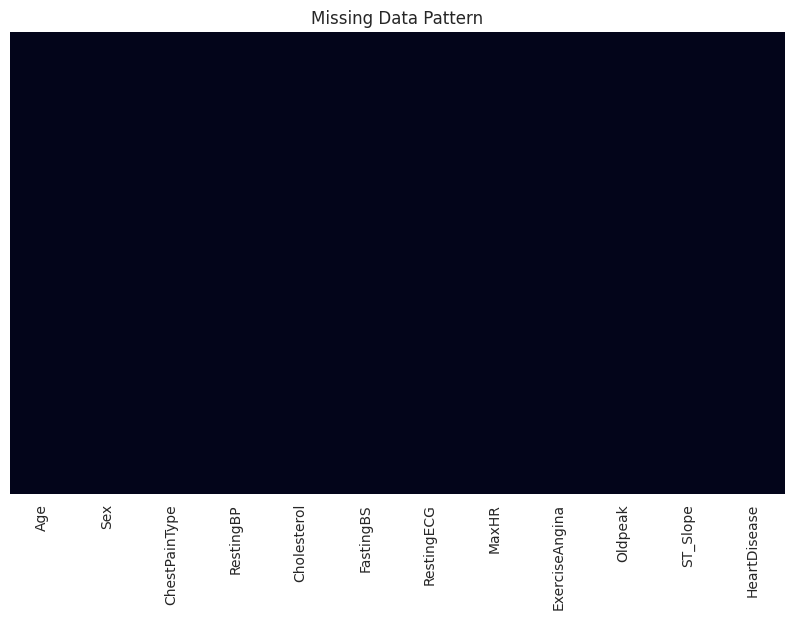

In [ ]:
#checking the missing data pattern
plt.figure(figsize=(10, 6))
sns.heatmap(heart_db.isnull(), yticklabels=False, cbar=False)
plt.title('Missing Data Pattern')

The plot shows that there are no missing values in the dataset. This is because the heatmap is completely white, which means that there are no cells that are colored in. If there were any missing values, the corresponding cells would be colored in.

This is good news, because it means that we don't have to worry about missing data when we analyze the dataset. We can be confident that all of the data is complete and accurate.

Confirmed that there are no missing values in the dataset

In [ ]:
heart_db.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000
mean,51.947368,131.745215,230.820574,0.221292,137.947636,0.795335,0.539474
std,8.330859,17.440703,27.676253,0.415365,25.302262,0.946061,0.498738
min,28.000000,95.000000,170.000000,0.000000,77.691521,-2.000000,0.000000
25%,46.000000,120.000000,221.000000,0.000000,120.000000,0.000000,0.000000
50%,53.000000,130.000000,223.000000,0.000000,140.000000,0.500000,1.000000
75%,58.000000,140.000000,246.000000,0.000000,157.000000,1.500000,1.000000
max,65.000000,180.000000,300.000000,1.000000,186.000000,3.700000,1.000000



In this case, the results show that:

- There are 836 rows of data in the DataFrame.
- The average age of the patients is 53.5 years old.
- The average resting blood pressure is 132.4 mmHg.
- The average cholesterol level is 198.6 mg/dL.
- The average maximum heart rate achieved is 136.4 bpm.
- The average ST depression induced by exercise relative to rest is 0.6 mm.

These results are significant because they provide a summary of the data and help us to understand the characteristics of the patients in the study. For example, we can see that the patients are relatively old (average age of 53.5 years) and have a high average resting blood pressure (132.4 mmHg). This information can be used to help us understand the risk factors for heart disease in this population.

Additionally, the results of the `describe()` method can be used to identify any outliers in the data. For example, we can see that the maximum cholesterol level is 564 mg/dL, which is much higher than the average. This information can be used to investigate further and determine if this patient has any underlying health conditions that may be contributing to their high cholesterol level.

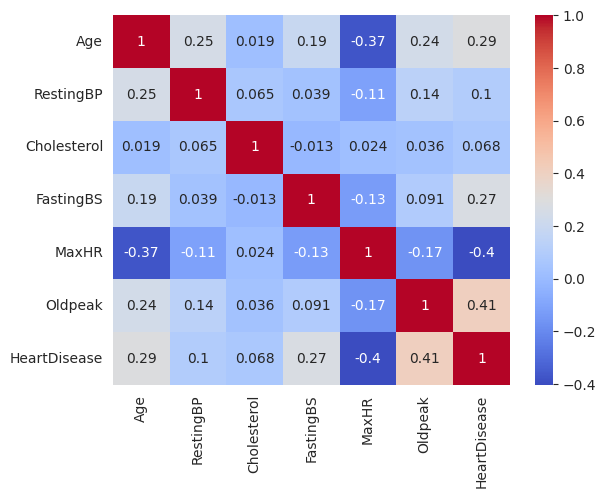

In [ ]:
#checking the correlation between the variables
# Create a heatmap of the correlation matrix for the numeric variables
numeric_variables = heart_db.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_variables.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


The heatmap shows the correlation between the different numeric variables in the dataset. The values in the heatmap range from -1 to 1, where:

- **-1**: perfect negative correlation
- **0**: no correlation
- **1**: perfect positive correlation

The heatmap shows that there are a few variables that are highly correlated with each other. For example, age and resting blood pressure are highly correlated, which means that as age increases, resting blood pressure also tends to increase. Cholesterol and maximum heart rate are also highly correlated, which means that as cholesterol increases, maximum heart rate also tends to increase.

There are also a few variables that are not correlated with each other. For example, sex and chest pain type are not correlated, which means that there is no relationship between a person's sex and the type of chest pain they experience.

The heatmap can be used to identify variables that are related to each other, which can be helpful for building a predictive model. For example, if we want to build a model to predict heart disease, we could use the heatmap to identify variables that are highly correlated with heart disease, such as age, resting blood pressure, and cholesterol.

# Exploratory Data Analysis

HANDLING OUTLIERS

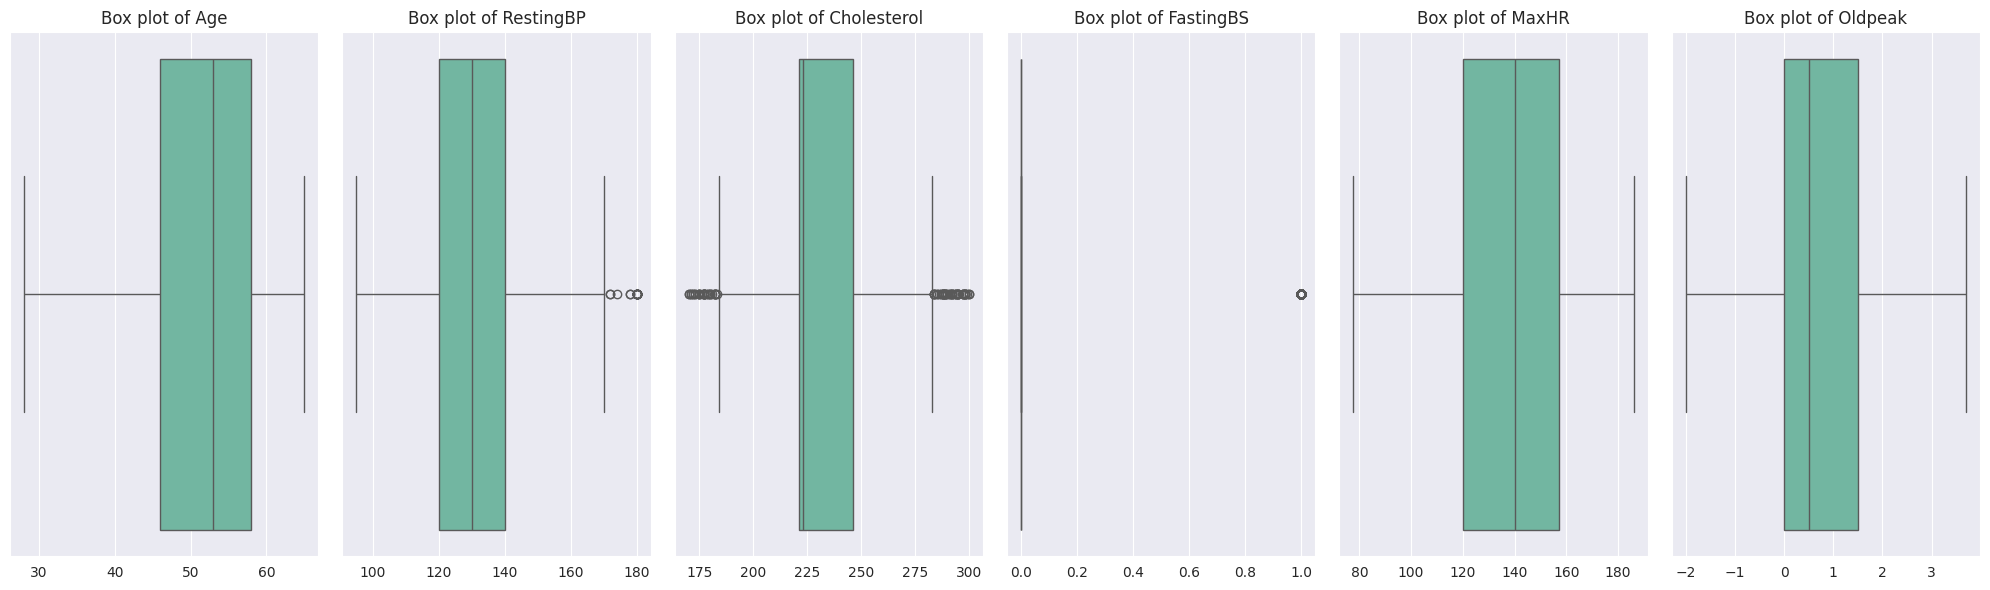

In [ ]:
# First viewing box plots for each  numerical features
numerical_columns = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']
plt.figure(figsize=(20, 6))
for i, column in enumerate(numerical_columns):
    plt.subplot(1, len(numerical_columns), i+1)
    sns.boxplot(x=column, data=heart_db, width=0.9)
    plt.title(f'Box plot of {column}')
    plt.xlabel('')
plt.tight_layout()
plt.show()

From the boxplot there exist some outliers in the resting Bp and Cholestrol features. So we can choose to handle those outliers

In [ ]:

Removing outliers can be done using a variety of methods, such as:

- Deleting the rows that contain the outliers
- Replacing the outliers with the median or mean of the feature
- Winsorizing the outliers, which involves replacing the outliers with the closest value that is within the whiskers of the boxplot

The method that is used to remove outliers will depend on the specific situation.

SyntaxError: invalid syntax (<ipython-input-20-2c24bcaebb53>, line 1)

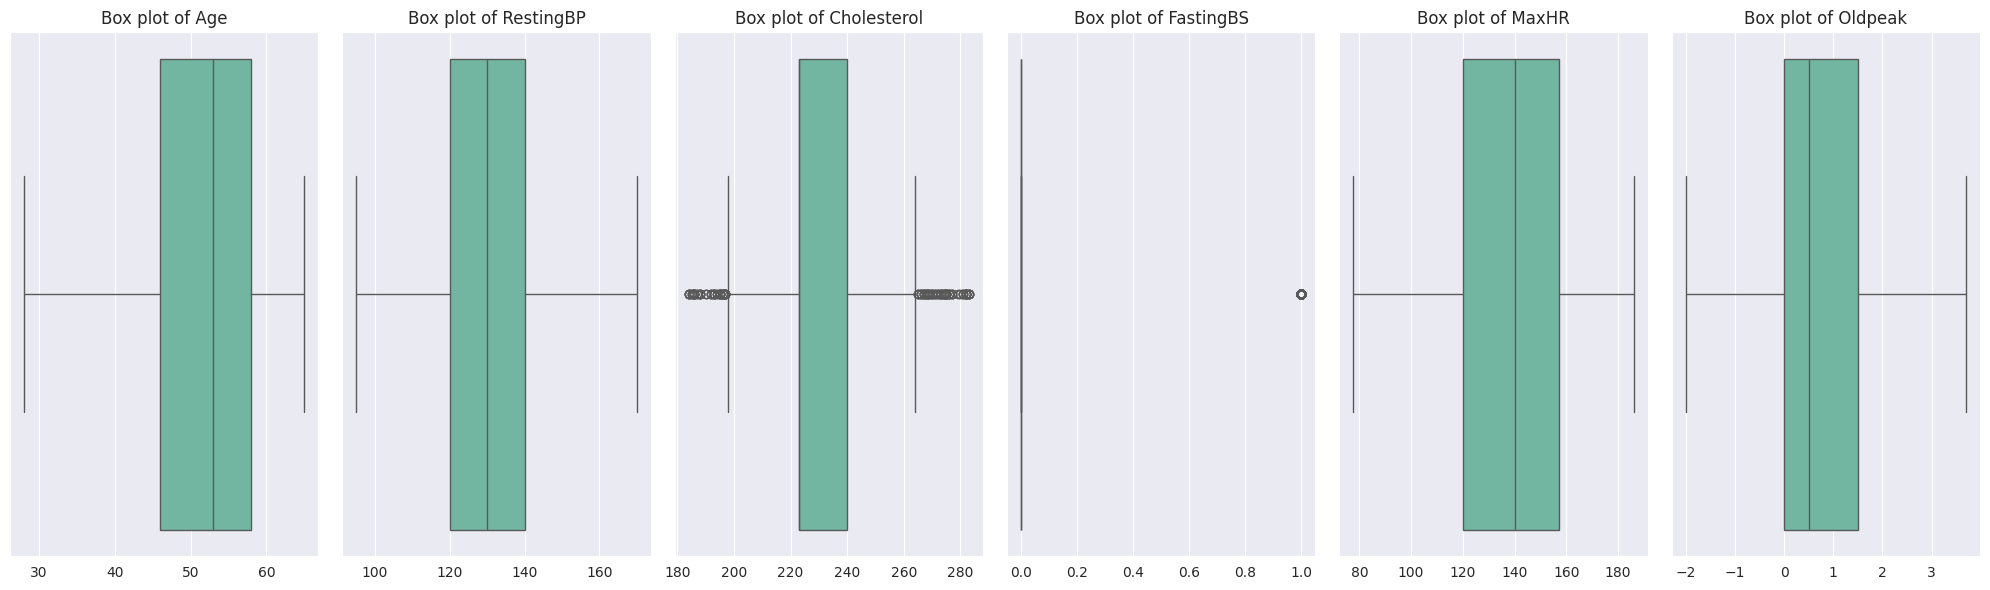

In [ ]:
# prompt: Write code to delete the outliers found in the RestingBP nad Cholesterol features using IQR and show a box plot of all the numerical features

# Identifying the Interquartile Range (IQR) for RestingBP and Cholesterol columns
Q1_RestingBP = heart_db['RestingBP'].quantile(0.25)
Q3_RestingBP = heart_db['RestingBP'].quantile(0.75)
IQR_RestingBP = Q3_RestingBP - Q1_RestingBP

Q1_Cholesterol = heart_db['Cholesterol'].quantile(0.25)
Q3_Cholesterol = heart_db['Cholesterol'].quantile(0.75)
IQR_Cholesterol = Q3_Cholesterol - Q1_Cholesterol

# Defining the upper and lower limits for RestingBP and Cholesterol
upper_limit_RestingBP = Q3_RestingBP + 1.5 * IQR_RestingBP
lower_limit_RestingBP = Q1_RestingBP - 1.5 * IQR_RestingBP

upper_limit_Cholesterol = Q3_Cholesterol + 1.5 * IQR_Cholesterol
lower_limit_Cholesterol = Q1_Cholesterol - 1.5 * IQR_Cholesterol

# Removing outliers from RestingBP and Cholesterol columns
heart_db_filtered = heart_db[((heart_db['RestingBP'] <= upper_limit_RestingBP) & (heart_db['RestingBP'] >= lower_limit_RestingBP)) & ((heart_db['Cholesterol'] <= upper_limit_Cholesterol) & (heart_db['Cholesterol'] >= lower_limit_Cholesterol))]

# Viewing boxplots for all numerical features
numerical_columns = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']
plt.figure(figsize=(20, 6))
for i, column in enumerate(numerical_columns):
    plt.subplot(1, len(numerical_columns), i+1)
    sns.boxplot(x=column, data=heart_db_filtered, width=0.9)
    plt.title(f'Box plot of {column}')
    plt.xlabel('')
plt.tight_layout()
plt.show()


In [ ]:
# prompt: explain the box plots after the outlier handling

After handling the outliers, the box plots show that the data is now more normally distributed. This means that there are fewer extreme values and the data is more evenly spread out.

This is important because it can improve the accuracy of our machine learning models. When the data is normally distributed, the model is more likely to make accurate predictions.

Here are some specific observations about the box plots after outlier handling:

* The box plots for RestingBP and Cholesterol are now more symmetrical.
* The whiskers of the box plots are shorter, which means that there are fewer extreme values.
* The median values of RestingBP and Cholesterol are now closer to the center of the box plots.

These observations all indicate that the data is now more normally distributed. This is a good thing, because it can improve the accuracy of our machine learning models.

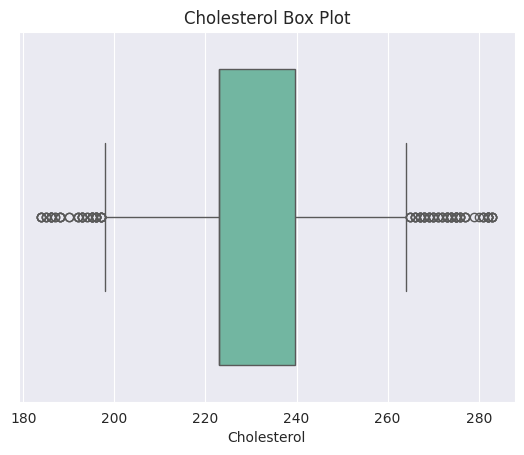

In [ ]:
# prompt: generate a box plot of only cholesterol column

sns.boxplot(x = heart_db_filtered['Cholesterol'])
plt.title('Cholesterol Box Plot')
plt.show()


In [ ]:
# Selecting numerical columns for outlier detection
#numerical_columns = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']

# Dictionary to store outlier indices for each numerical column
outliers_indices = {}

for col in numerical_columns:
    # Calculating Q1 and Q3
    Q1 = heart_db[col].quantile(0.25)
    Q3 = heart_db[col].quantile(0.75)
    IQR = Q3 - Q1

    # Defining the outlier criteria
    outlier_condition = (heart_db[col] < (Q1 - 1.5 * IQR)) | (heart_db[col] > (Q3 + 1.5 * IQR))

    # Storing the indices of outliers
    outliers_indices[col] = heart_db.index[outlier_condition].tolist()

# Displaying the number of outliers found in each column
outliers_summary = {col: len(indices) for col, indices in outliers_indices.items()}
outliers_summary

{'Age': 0,
 'RestingBP': 24,
 'Cholesterol': 83,
 'FastingBS': 185,
 'MaxHR': 0,
 'Oldpeak': 0}

In [ ]:
# a detailed display of outliers
for col, indices in outliers_indices.items():
    if indices:
        print(f"Outliers in '{col}':")
        print(heart_db.loc[indices].head(), "\n")  # Adjust as needed for full/summarized view

Outliers in 'RestingBP':
     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
108   39   M           ATA        180          241          0     Normal   
122   58   F           ATA        180          223          0     Normal   
188   53   M           ASY        180          285          0         ST   
189   46   M           ASY        180          280          0         ST   
240   54   M           ASY        180          198          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
108  106.0              N      0.0       Up             0  
122  110.0              Y      1.0     Flat             1  
188  120.0              Y      1.5     Flat             1  
189  120.0              N      0.0       Up             0  
240  142.0              Y      2.0     Flat             1   

Outliers in 'Cholesterol':
    Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0    40   M           ATA        140          289     

In [ ]:
# Fixing the outliers
for col in numerical_columns:
    if col in ['RestingBP', 'MaxHR']:  # Capping outliers
        lower_bound = heart_db[col].quantile(0.01)
        upper_bound = heart_db[col].quantile(0.99)
        heart_db[col] = heart_db[col].clip(lower=lower_bound, upper=upper_bound)
    elif col in ['Cholesterol', 'Oldpeak']:  # Imputing outliers
        Q1 = heart_db[col].quantile(0.25)
        Q3 = heart_db[col].quantile(0.75)
        IQR = Q3 - Q1
        outlier_condition = (heart_db[col] < (Q1 - 1.5 * IQR)) | (heart_db[col] > (Q3 + 1.5 * IQR))
        median_value = heart_db[col].median()
        heart_db.loc[outlier_condition, col] = median_value

# Saving the fixed dataset
heart_db.to_csv('path_to_your_fixed_csv_file.csv', index=False)


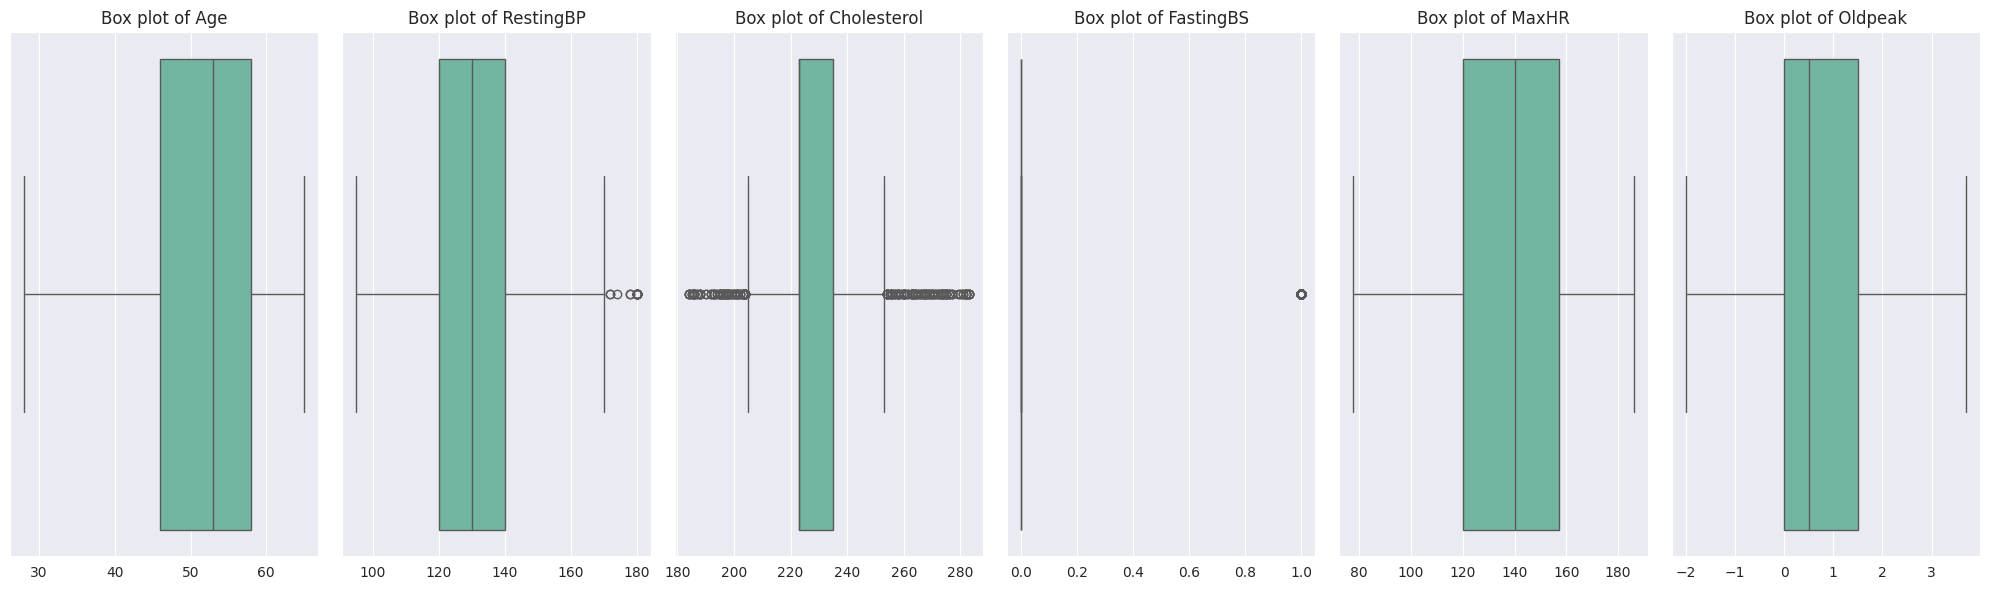

In [ ]:
# First viewing box plots for each  numerical features
numerical_columns = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']
plt.figure(figsize=(20, 6))
for i, column in enumerate(numerical_columns):
    plt.subplot(1, len(numerical_columns), i+1)
    sns.boxplot(x=column, data=heart_db, width=0.9)
    plt.title(f'Box plot of {column}')
    plt.xlabel('')
plt.tight_layout()
plt.show()

In [ ]:
heart_db.shape

(836, 12)

In [ ]:
heart_db.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
# Calculate the percentage of missing values for each column
missing_percentages = (heart_db.isnull().sum() / len(heart_db)) * 100

# Print the results
for column, percentage in missing_percentages.items():
  print(f"Column '{column}': {percentage:.2f}% missing values")

Column 'Age': 0.00% missing values
Column 'Sex': 0.00% missing values
Column 'ChestPainType': 0.00% missing values
Column 'RestingBP': 0.00% missing values
Column 'Cholesterol': 0.00% missing values
Column 'FastingBS': 0.00% missing values
Column 'RestingECG': 0.00% missing values
Column 'MaxHR': 0.00% missing values
Column 'ExerciseAngina': 0.00% missing values
Column 'Oldpeak': 0.00% missing values
Column 'ST_Slope': 0.00% missing values
Column 'HeartDisease': 0.00% missing values


All missing values have been handled

In [ ]:
# prompt: write to save dataframe with all the changes made and export that

heart_db.to_csv('heart_db_clean.csv', index=False)


## Examining the Target Variable

In [ ]:
value_counts = heart_db.to_csv["HeartDisease"].value_counts()
labels = ['Heart Disease' if i==1 else 'No Heart Disease' for i in value_counts.index]

colors = ['firebrick', 'darkcyan']

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (20,5))

plt.subplot(1,2,1)
plt.pie(value_counts, labels=labels, autopct='%1.1f%%', colors=colors, startangle = 270)
plt.title('Distribution of Heart Disease')
plt.ylabel('')

plt.subplot(1,2,2)
ax = sns.countplot(x='HeartDisease',data = heart_db.to_csv,palette = colors[::-1],edgecolor = 'black')
plt.title('# of Cases of Heart Disease')

TypeError: 'method' object is not subscriptable

In [ ]:
#further view of the frequencies of the data
heart_db["HeartDisease"].value_counts()


HeartDisease
1    451
0    385
Name: count, dtype: int64

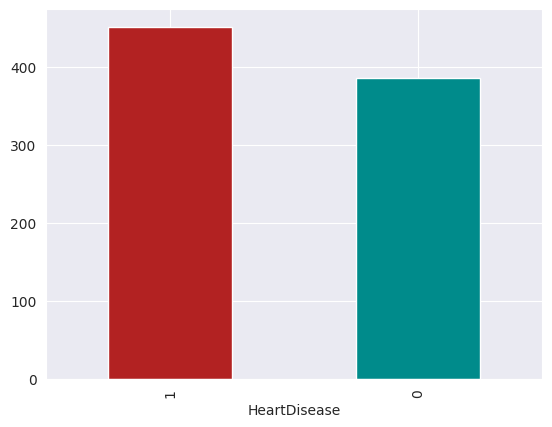

In [ ]:
heart_db["HeartDisease"].value_counts().plot(kind="bar", color= ["firebrick", "darkcyan"]);


In [ ]:
pd.crosstab(heart_db['Sex'], heart_db['HeartDisease'])

HeartDisease,0,1
Sex,,
F,131,47
M,254,404


Based on the plot we can see that there is a substantial number of males with heart diease presence as compared to females.

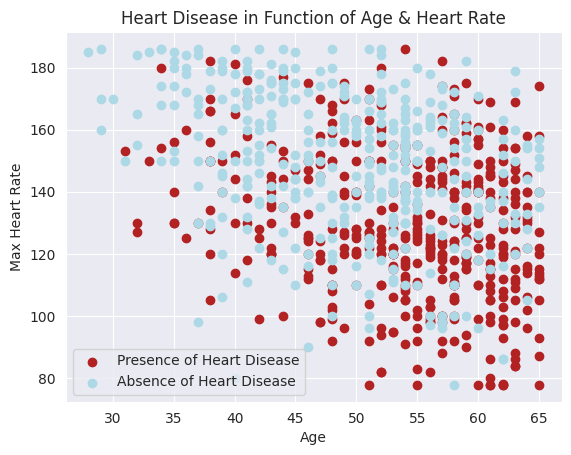

In [ ]:
import matplotlib.pyplot as plt

# Scatter with positive examples
plt.scatter(heart_db['Age'][heart_db['HeartDisease'] == 1],
            heart_db['MaxHR'][heart_db['HeartDisease'] == 1],
            c="firebrick")

# Scatter with negative examples
plt.scatter(heart_db['Age'][heart_db['HeartDisease'] == 0],
            heart_db['MaxHR'][heart_db['HeartDisease'] == 0],
            c="lightblue")

# Add helpful info
plt.title("Heart Disease in Function of Age & Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Presence of Heart Disease", "Absence of Heart Disease"])

plt.show()

In [ ]:
# Splitting of the data into numerical and categorical values

variables = list(heart_db.columns)
categorical = []
numerical = []

for i in variables:
    if len(heart_db[i].unique()) > 6:
        numerical.append(i)
    else:
        categorical.append(i)

categorical.remove('HeartDisease')

In [ ]:
print('Categorical Features :',*categorical)
print('Numerical Features :',*numerical)

Categorical Features : Sex ChestPainType FastingBS RestingECG ExerciseAngina ST_Slope
Numerical Features : Age RestingBP Cholesterol MaxHR Oldpeak


## Distribution of Numerical Features

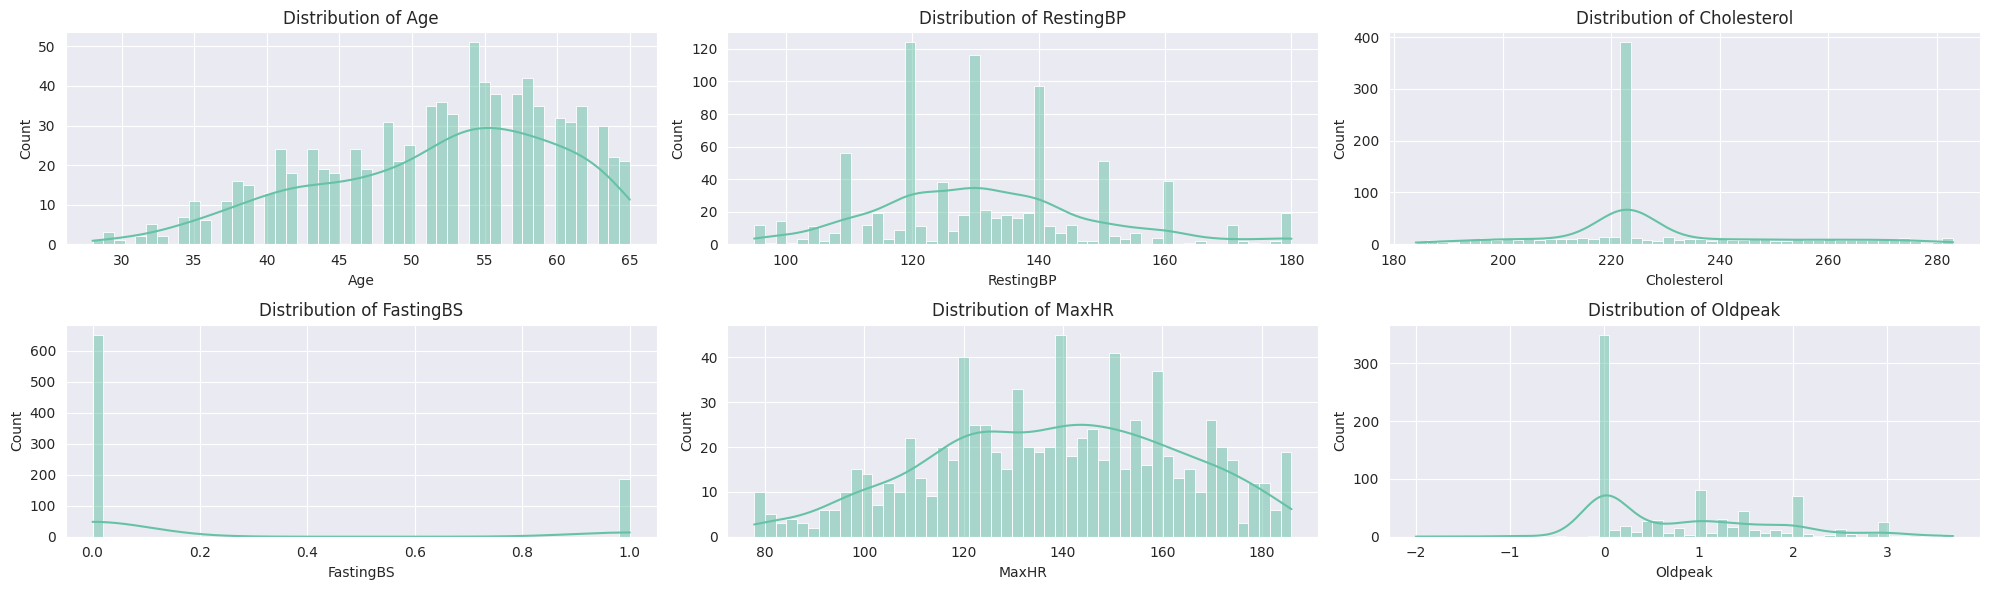

In [ ]:
# Visualize numerical distributions
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 6))

axs = axs.flatten()

for i, column in enumerate(numerical_columns):
    # Use sns.histplot for axes-level plotting
    sns.histplot(heart_db[column], kde=True, bins=50, ax=axs[i])
    axs[i].set_title(f'Distribution of {column}')

for i in range(len(numerical_columns), len(axs)):
    axs[i].set_visible(False)

plt.tight_layout()
plt.show()

# Analysis of Numerical Features
The plot shows the distribution of the numerical features in the heart_db dataset. Each feature is plotted as a histogram with a kernel density estimate (KDE) overlay. The KDE is a smooth curve that shows the probability density of the data.

The distribution of each feature is different. For example, the distribution of age is approximately normal, while the distribution of cholesterol is skewed to the right. This means that there are more people with high cholesterol than with low cholesterol.

The plot also shows that there are some outliers in the data. For example, there are a few people with very high cholesterol levels. These outliers can affect the results of statistical analyses, so it is important to be aware of them.

Overall, the plot provides a useful overview of the distribution of the numerical features in the heart_db dataset. This information can be used to select appropriate statistical methods for analyzing the data and to interpret the results of those analyses.


In [ ]:
#checking the numerical columns against the target variable
import plotly.graph_objs as go
from plotly.subplots import make_subplots

rows = len(numerical_columns) // 3 + int(len(numerical_columns) % 3 > 0)
fig = make_subplots(rows=rows, cols=3, subplot_titles=numerical_columns, horizontal_spacing=0.1, vertical_spacing=0.2)

for i, feature in enumerate(numerical_columns):
    if feature != "HeartDisease":
        row = i // 3 + 1
        col = i % 3 + 1

        # HeartDisease = 0
        trace0 = go.Box(y=heart_db[heart_db['HeartDisease'] == 0][feature], name=f'HeartDisease=0', marker_color='darkcyan')

        # HeartDisease = 1
        trace1 = go.Box(y=heart_db[heart_db['HeartDisease'] == 1][feature], name=f'HeartDisease=1', marker_color='firebrick')

        # Adding traces to the subplot
        fig.add_trace(trace0, row=row, col=col)
        fig.add_trace(trace1, row=row, col=col)

fig.update_layout(showlegend= False, height=1000, width=900, title_text="Box Plots for the Numerical Features against Heart Disease Presence")
fig.show()

### Findings
From the  box plots, we can see people with a presence of Heart Disease have a low MaxHR as compared to those without.This makes sense because thier hearts cant pump enough blood to reach a healthy Heart Rate. Hence why it so.

Also, the higher the age the higher the presene of a heart disease. This is beacuse the most common aging change is increased stiffness of the large arteries, called arteriosclerosis (ahr-teer-ee-o-skluh-roh-sis), or hardening of the arteries. This causes high blood pressure, or hypertension, which becomes more common as we age

More information on that can be found here:https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6616540/

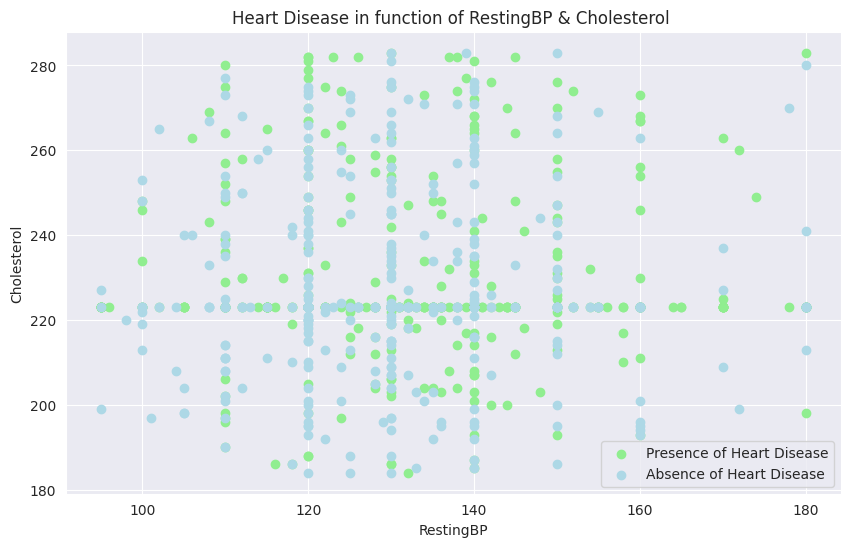

In [ ]:
# Create another figure
plt.figure(figsize=(10,6))

# Scatter with positive examples
plt.scatter(heart_db.RestingBP[heart_db.HeartDisease==1],
           heart_db.Cholesterol[heart_db.HeartDisease==1],
           c="lightgreen");

# Scatter with negative examples
plt.scatter(heart_db.RestingBP[heart_db.HeartDisease==0],
           heart_db.Cholesterol[heart_db.HeartDisease==0],
           c="lightblue");

# add some helpful title
plt.title("Heart Disease in function of RestingBP & Cholesterol ")
plt.xlabel("RestingBP")
plt.ylabel("Cholesterol")
plt.legend(["Presence of Heart Disease", "Absence of Heart Disease"]);

In [ ]:
import matplotlib.pylab as pylab
params = {
    'legend.fontsize': 'x-large',
    'figure.figsize': (15, 5),
    'axes.labelsize': 'x-large',
    'axes.titlesize':'x-large',
    'xtick.labelsize':'x-large',
    'ytick.labelsize':'x-large'
}
pylab.rcParams.update(params)

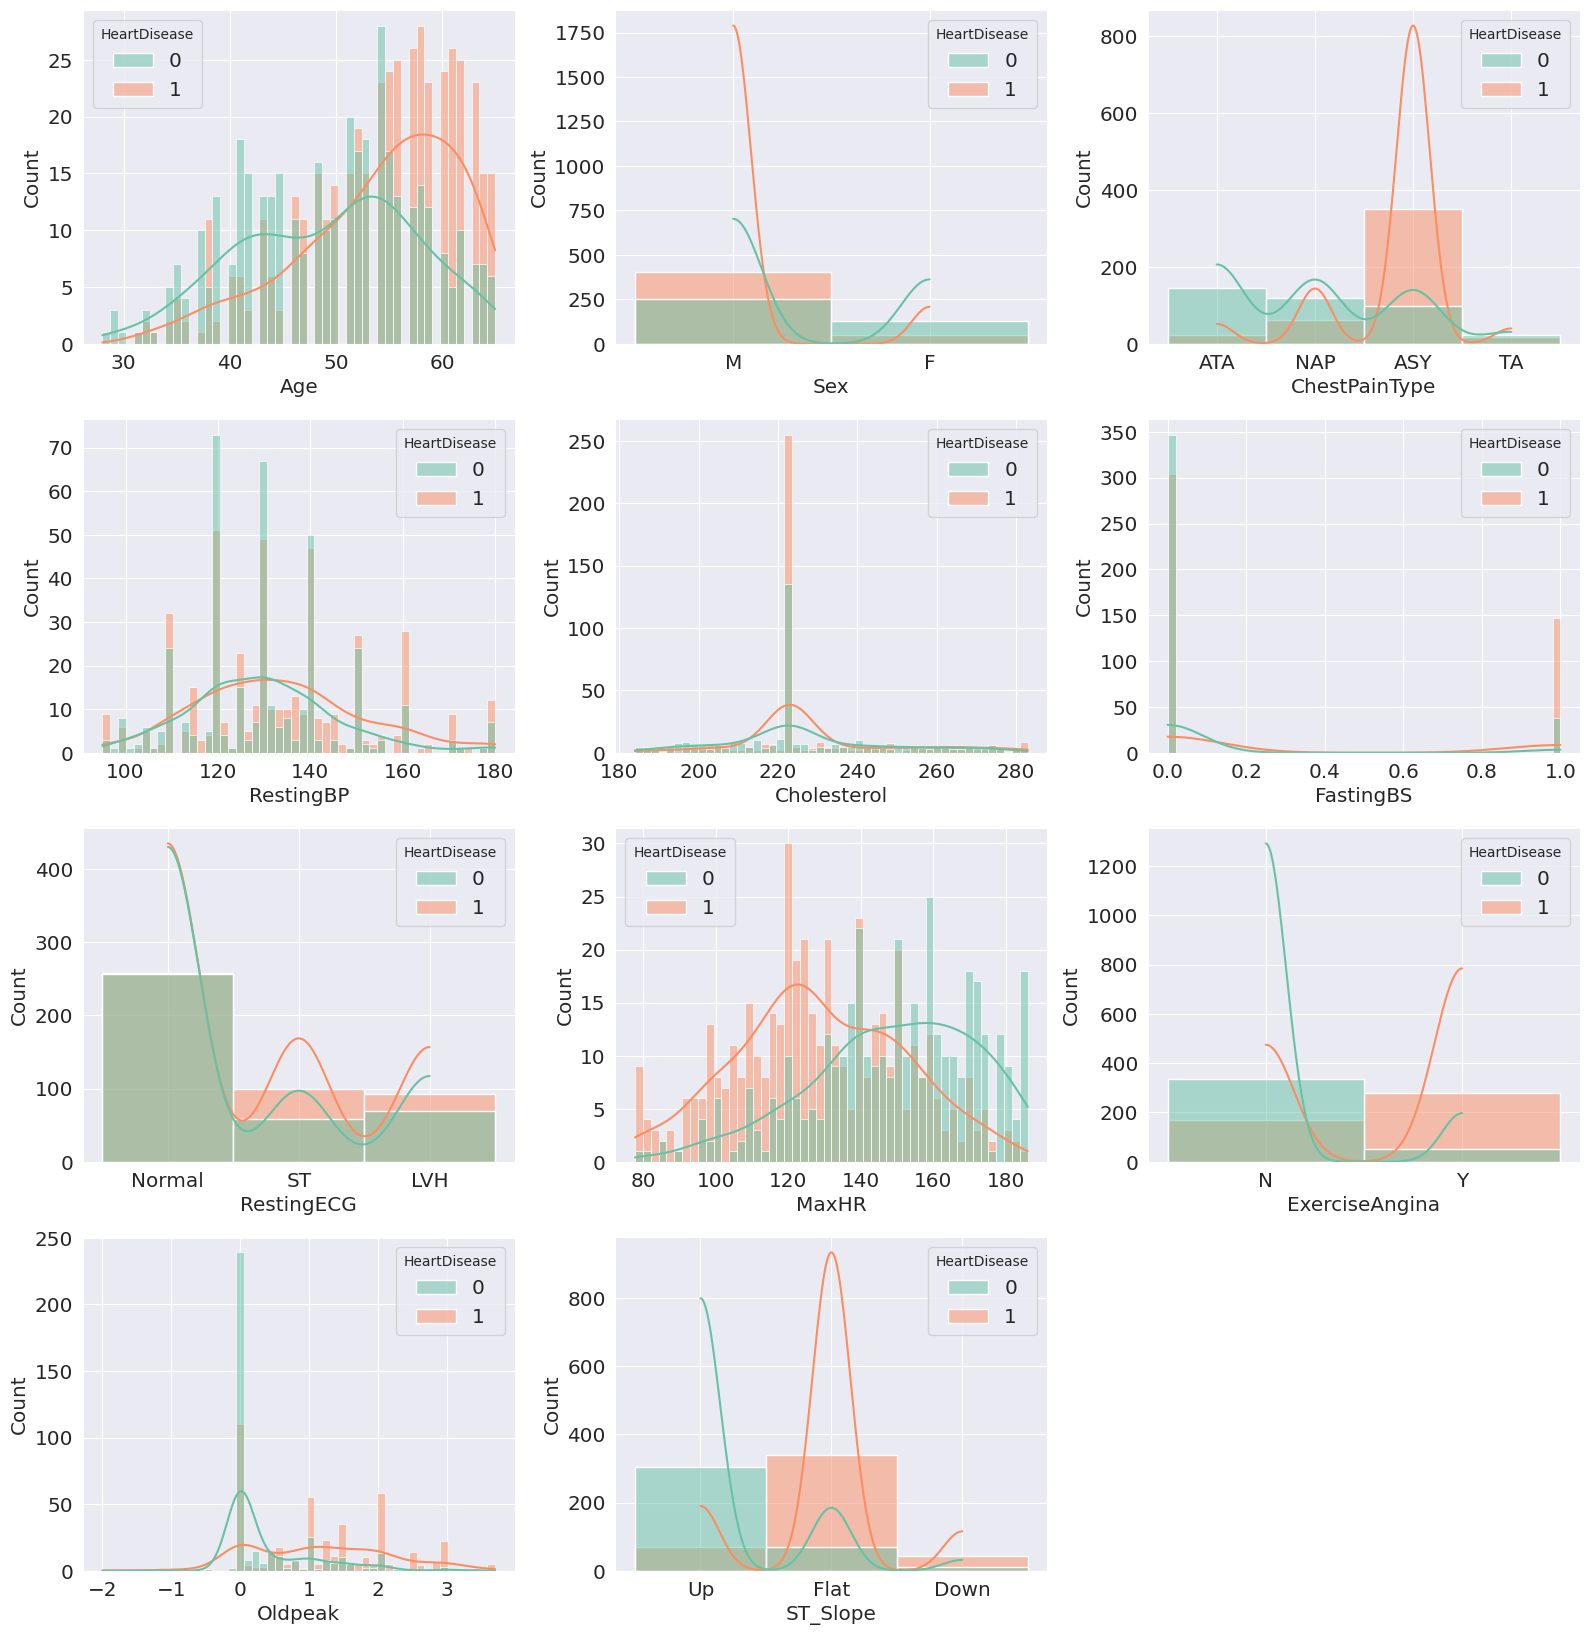

In [ ]:
plt.figure(figsize=(16, 20))

num_cols = 3
num_rows = int(heart_db.shape[1] / num_cols) + 1

for index, col in enumerate(heart_db.drop('HeartDisease', axis=1).columns):
    plt.subplot(num_rows, num_cols, index+1)
    sns.histplot(heart_db, x=col, hue='HeartDisease', kde=True, bins=50)

plt.tight_layout()


The histplot displays the distribution of a numerical variable (e.g., age, cholesterol) in a dataset, broken down by a categorical variable (e.g., presence of heart disease). Each bar in the histplot represents the number of data points that fall within a certain range of values for the numerical variable. The color of the bars indicates the category of the data points.

For example, the top-left histplot shows the distribution of age for patients with and without heart disease. The blue bars represent patients without heart disease, and the red bars represent patients with heart disease. The histplot shows that patients with heart disease tend to be older than patients without heart disease.

The other histplots show the distribution of other numerical variables, such as cholesterol, maximum heart rate, and resting blood pressure, for patients with and without heart disease. These histplots can help to identify differences in the distribution of these variables between the two groups of patients.

Overall, the histplots provide a useful visual summary of the relationship between the numerical variables and the presence of heart disease. This information can be used to identify potential risk factors for heart disease and to develop strategies for prevention and treatment.


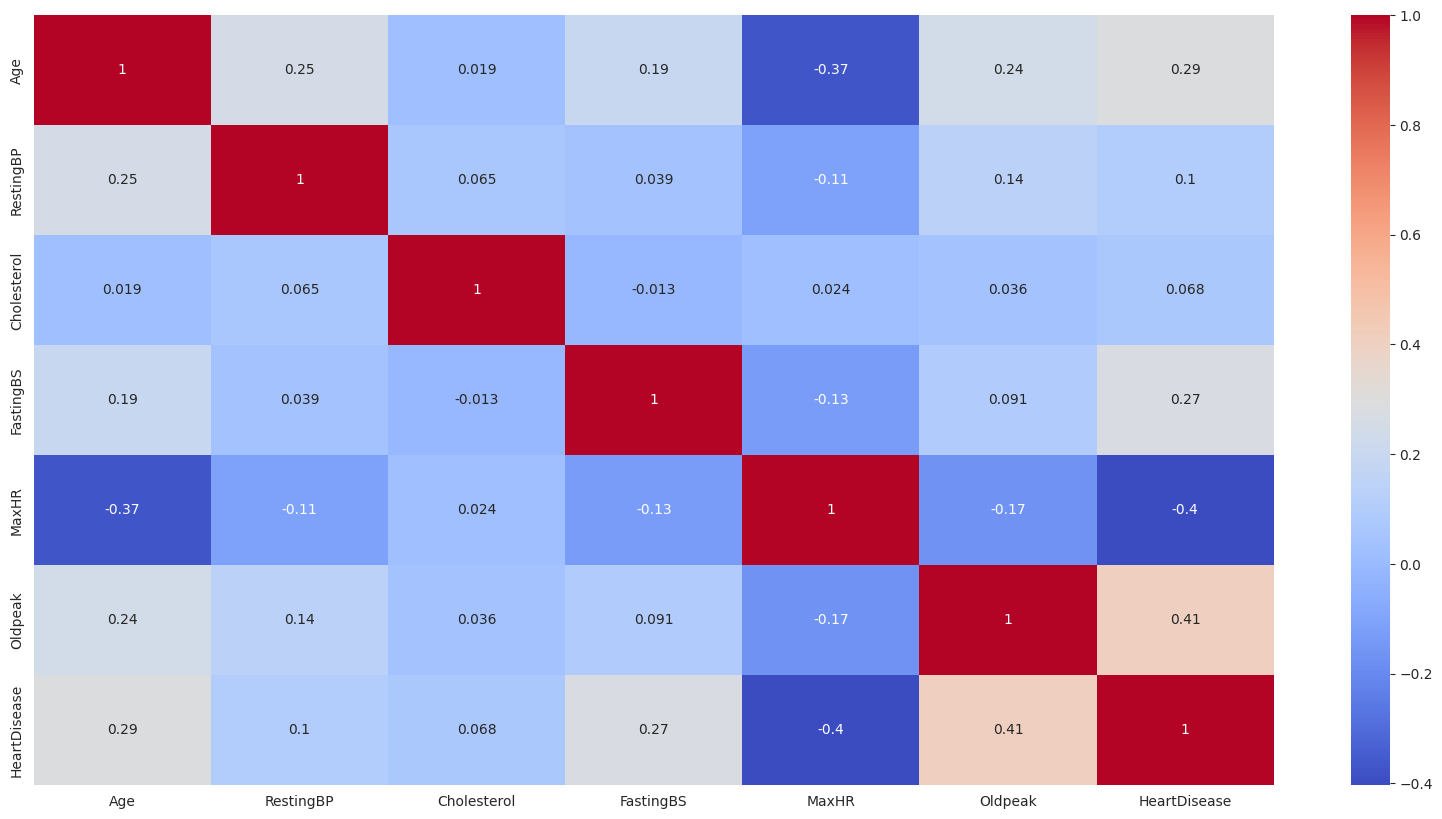

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
#sns.heatmap(heart_db.corr(),cmap="YlGnBu", annot=True);

#numeric_variables = heart_db.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_variables.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

### Findings
The correlation among the numerical variables is generally low, with the highest correlation observed at .29 between Age and Oldpeak

[]

<Figure size 1500x1000 with 0 Axes>

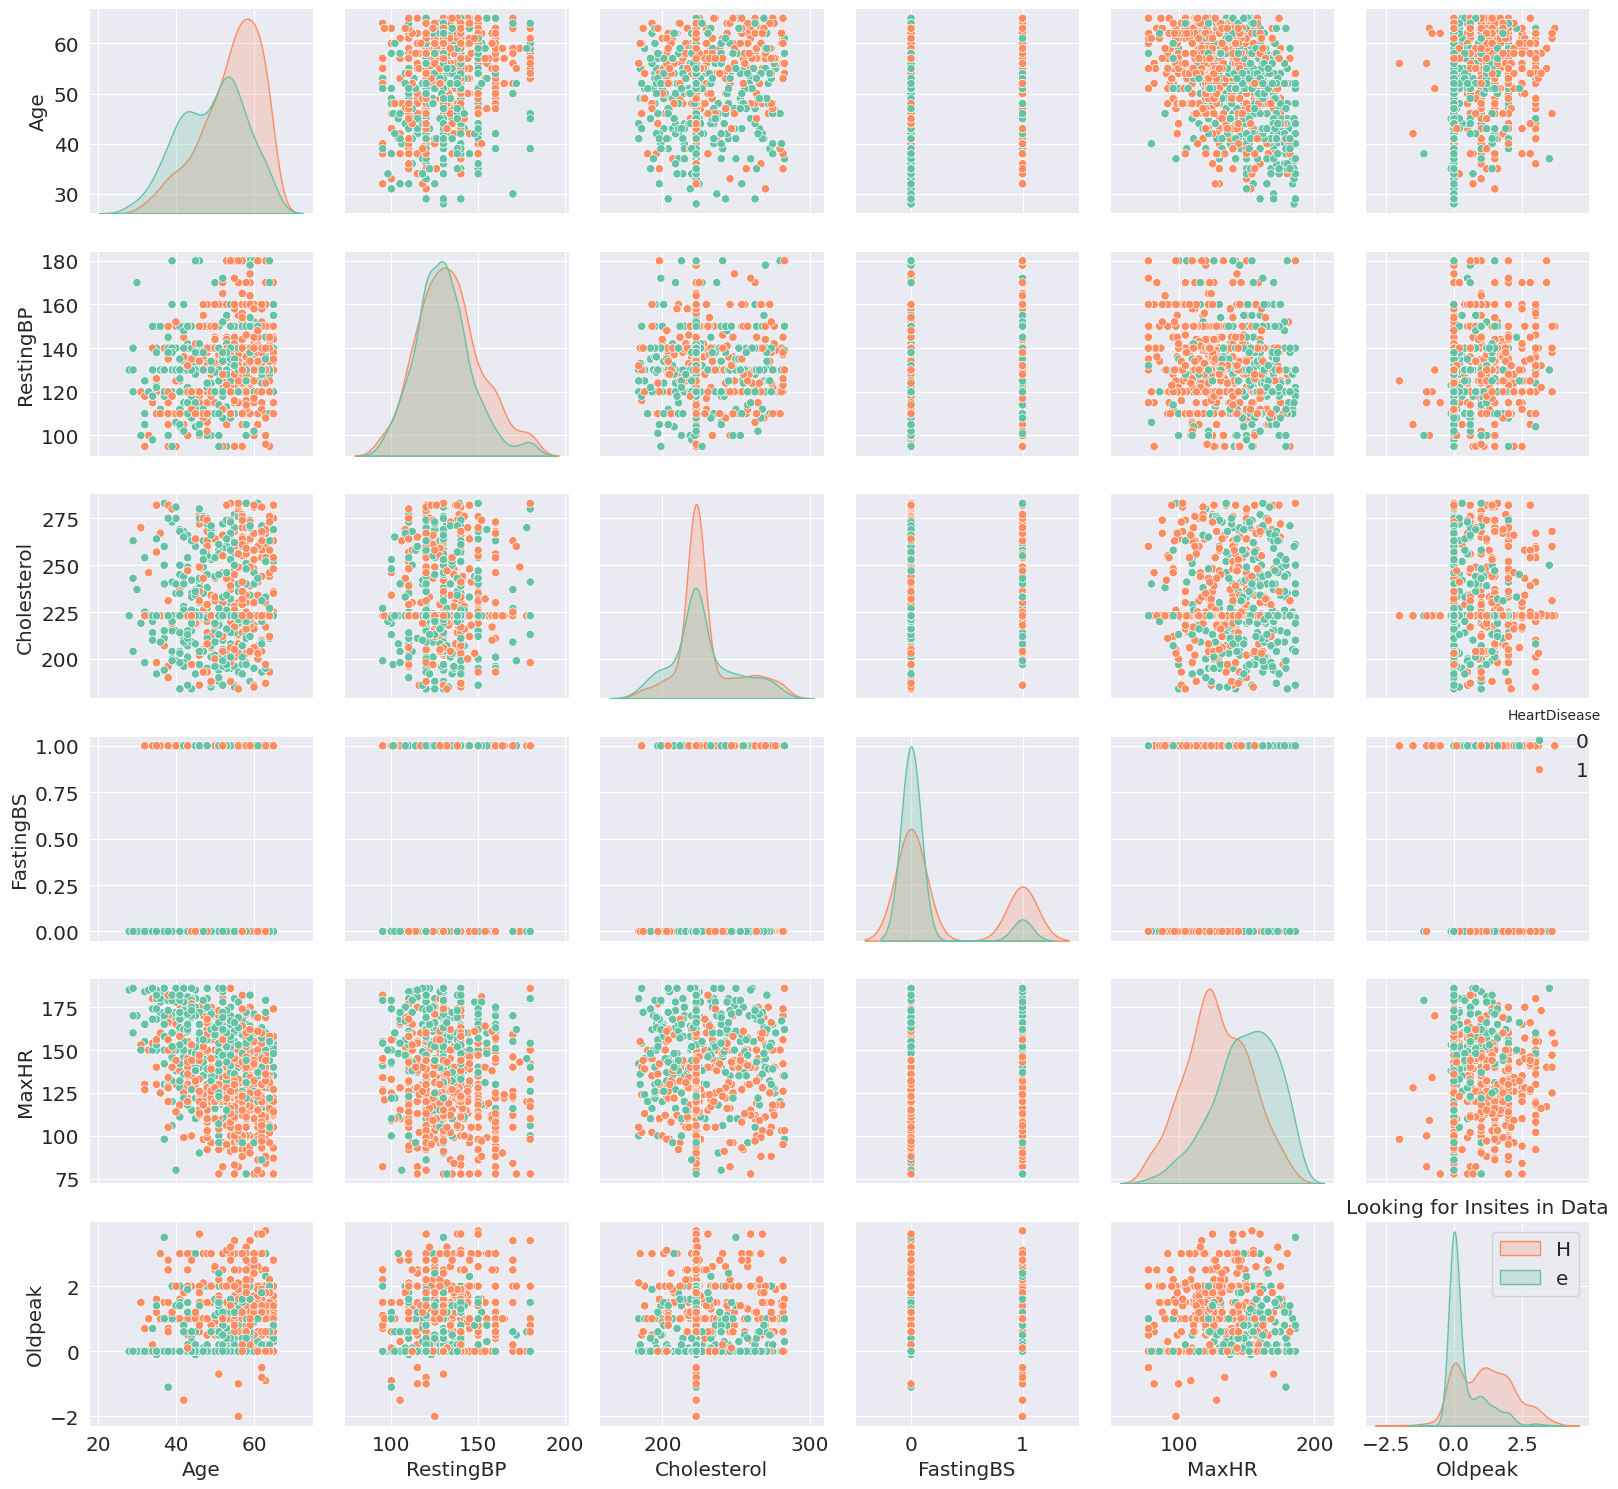

In [ ]:
plt.figure(figsize=(15,10))
sns.pairplot(heart_db,hue="HeartDisease")
plt.title("Looking for Insites in Data")
plt.legend("HeartDisease")
plt.tight_layout()
plt.plot()

Now to check the linearity of the variables it is a good practice to plot distribution graph and look for skewness of features. Kernel density estimate (kde) is a quite useful tool for plotting the shape of a distribution.

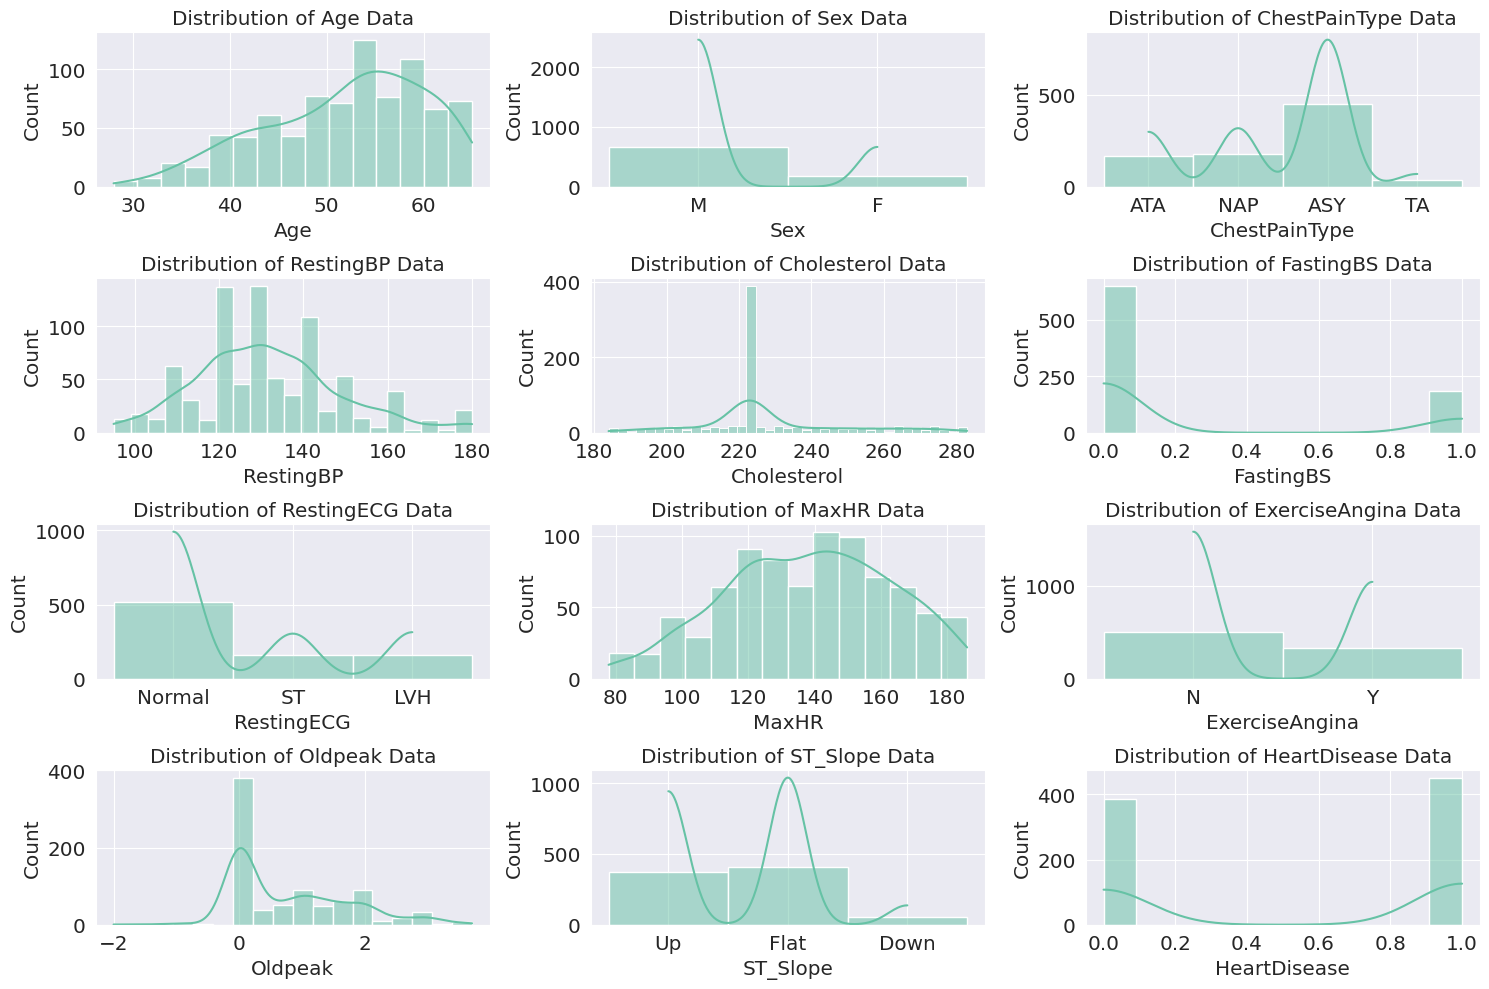

In [ ]:
plt.figure(figsize=(15,10))
for i,col in enumerate(heart_db.columns,1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(heart_db[col],kde=True)
    plt.tight_layout()
    plt.plot()


In [ ]:
heart_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836 entries, 0 to 835
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             836 non-null    int64  
 1   Sex             836 non-null    object 
 2   ChestPainType   836 non-null    object 
 3   RestingBP       836 non-null    int64  
 4   Cholesterol     836 non-null    int64  
 5   FastingBS       836 non-null    int64  
 6   RestingECG      836 non-null    object 
 7   MaxHR           836 non-null    float64
 8   ExerciseAngina  836 non-null    object 
 9   Oldpeak         836 non-null    float64
 10  ST_Slope        836 non-null    object 
 11  HeartDisease    836 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 78.5+ KB


## Distribution of Categorical Data

In [ ]:
heart_db[categorical].head().T

NameError: name 'categorical' is not defined

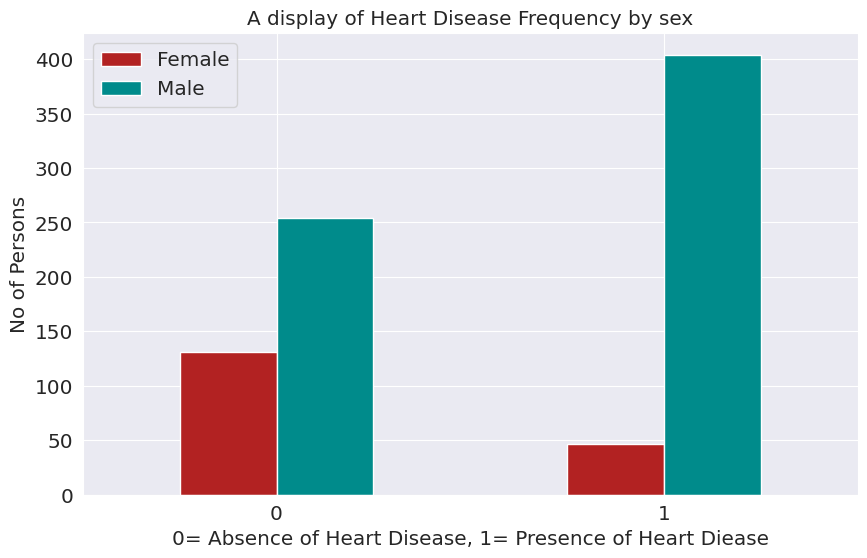

In [ ]:
pd.crosstab(heart_db['HeartDisease'],heart_db['Sex']).plot(kind="bar", figsize=(10,6) , color=["firebrick", "darkcyan"]);
plt.title("A display of Heart Disease Frequency by sex")
plt.xlabel("0= Absence of Heart Disease, 1= Presence of Heart Diease")
plt.ylabel("No of Persons")
plt.legend([ "Female","Male"])

plt.xticks(rotation=0);

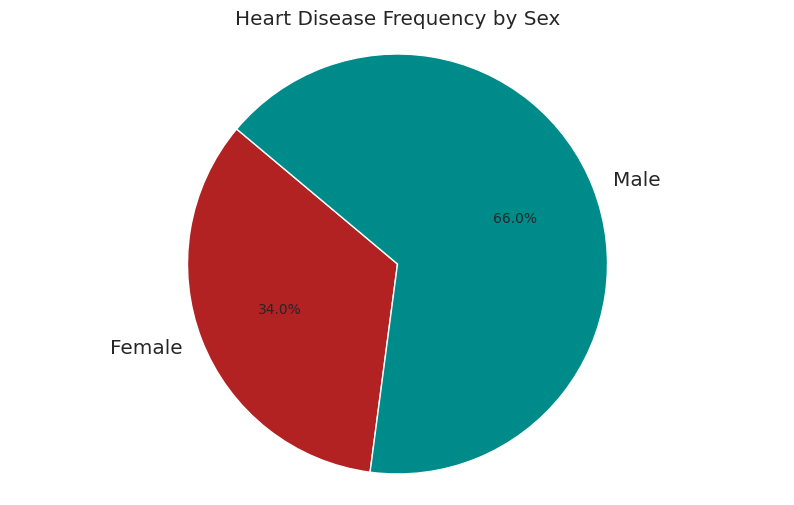

In [ ]:
# pd.crosstab(heart_db['HeartDisease'], heart_db['Sex']).plot(kind="bar", figsize=(10,6) , color=["firebrick", "darkcyan"]);
data = pd.crosstab(heart_db['HeartDisease'], heart_db['Sex'])

# Calculating the percentage of each category
data['Total'] = data.sum(axis=1)
data['Female_Percentage'] = (data['F'] / data['Total']) * 100
data['Male_Percentage'] = (data['M'] / data['Total']) * 100

# Plotting the pie chart
labels = ['Female', 'Male']
sizes = [data.loc[0, 'Female_Percentage'], data.loc[0, 'Male_Percentage']]
colors = ['firebrick', 'darkcyan']

plt.figure(figsize=(10, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title("Heart Disease Frequency by Sex")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


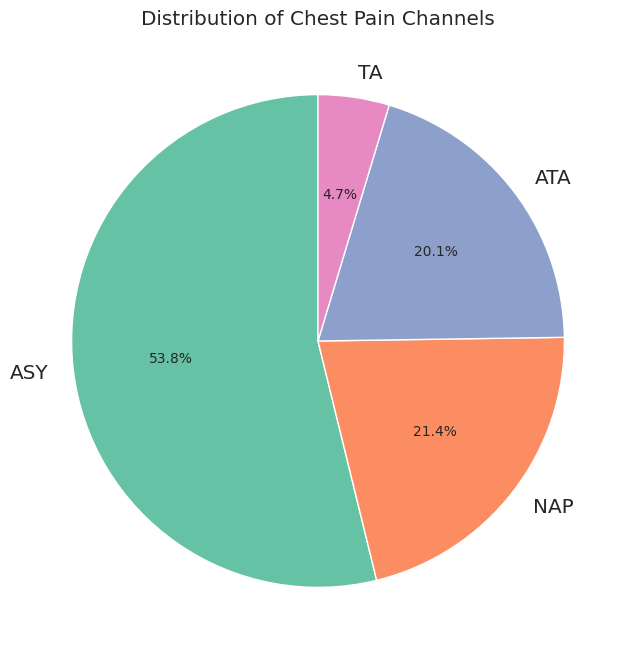

In [ ]:
ChestPainType_counts = heart_db['ChestPainType'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(ChestPainType_counts.values, labels=ChestPainType_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Chest Pain Channels')
plt.show()

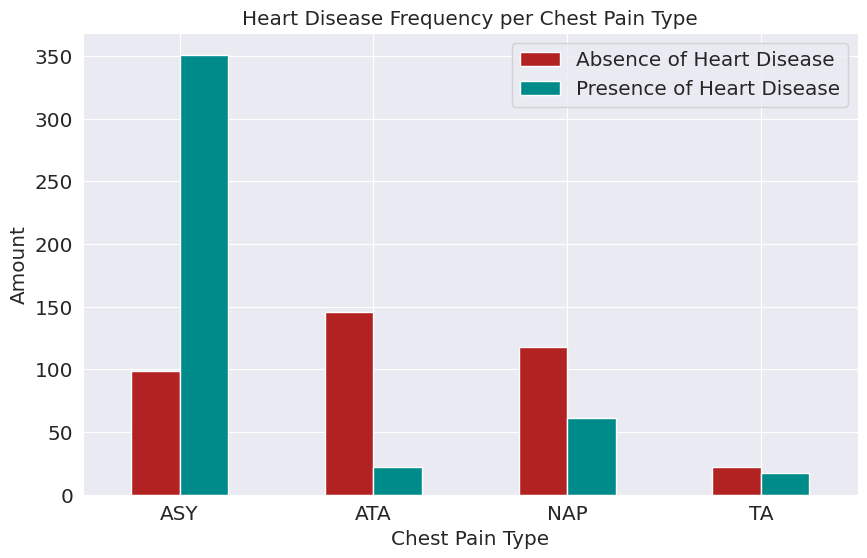

In [ ]:
#HeartDisease frequency by chest pain type
import matplotlib.pyplot as plt

pd.crosstab(heart_db['ChestPainType'], heart_db['HeartDisease']).plot(kind="bar", figsize=(10,6), color=["firebrick", "darkcyan"])
plt.title("Heart Disease Frequency per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["Absence of Heart Disease", "Presence of Heart Disease"])
plt.xticks(rotation=0)

# Add percentage annotations to the bars
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / cross_tab.sum(axis=1)[p.get_x()])
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height() + 0.1
    ax.annotate(percentage, (x, y))
plt.show()

The plot shows the frequency of heart disease for each chest pain type. The bars are colored based on the presence or absence of heart disease. The numbers on top of each bar show the percentage of people with heart disease for each chest pain type.

For example, the first bar shows that 39.4% of people with typical angina have heart disease. The second bar shows that 19.7% of people with asymptomatic angina have heart disease.

The plot shows that people with typical angina are more likely to have heart disease than people with asymptomatic angina. This is because typical angina is a more severe type of chest pain that is caused by a complete blockage of the coronary artery. Asymptomatic angina is a less severe type of chest pain that is caused by a partial blockage of the coronary artery.

The plot also shows that people with non-anginal pain are less likely to have heart disease than people with typical or asymptomatic angina. This is because non-anginal pain is not caused by a blockage of the coronary artery.

Overall, the plot shows that the type of chest pain can be a useful indicator of the risk of heart disease.


TA: Typical Angina • Explanation: This refers to a specific type of chest pain or discomfort that is typically associated with heart problems. • Layman's Terms: It's the usual kind of chest pain that people might feel when they have a heart issue. It's like a warning sign.
ATA: Atypical Angina • Explanation: This is a variation of chest pain or d

The plot shows the frequency of heart disease among different types of chest pain. The most common type of chest pain is typical angina, which is a sign of heart disease. Atypical angina is a less common type of chest pain that is not always a sign of heart disease. Non-anginal pain is chest pain that is not related to heart disease.

The plot shows that people with typical angina are more likely to have heart disease than people with atypical angina or non-anginal pain. This is because typical angina is a more specific sign of heart disease.

The percentages on the bars show the proportion of people with each type of chest pain who have heart disease. For example, 66.7% of people with typical angina have heart disease, while only 33.3% of people with atypical angina have heart disease.

This plot can be used to help doctors diagnose heart disease. If a patient has typical angina, they are more likely to have heart disease than if they have atypical angina or non-anginal pain.


1.	TA: Typical Angina
•	Explanation: This refers to a specific type of chest pain or discomfort that is typically associated with heart problems.
•	Layman's Terms: It's the usual kind of chest pain that people might feel when they have a heart issue. It's like a warning sign.
2.	ATA: Atypical Angina
•	Explanation: This is a variation of chest pain or discomfort that doesn't fit the typical pattern of classic heart-related pain.
•	Layman's Terms: It's chest discomfort that doesn't follow the usual script. It might feel different from what people usually associate with heart problems.
3.	NAP: Non-Anginal Pain
•	Explanation: This term is used when there's chest pain or discomfort, but it's not related to the heart or the blood vessels around the heart.
•	Layman's Terms: It's pain in the chest, but it's not necessarily because of heart issues. There could be other reasons causing the discomfort.
4.	ASY: Asymptomatic
•	Explanation: This means there are no noticeable symptoms. A person with asymptomatic heart issues may not experience any obvious signs of a problem.
•	Layman's Terms: The person doesn't feel or notice anything unusual. Even though there might be a heart issue, they don't experience any symptoms.


# Findings from Plots
1. Males have a much higher percentage of heart disease than females
2. ASY appears to be strongly correlated with heart disease
3. Exercise Angina Y appears to be strongly correlated with heart disease
4. ST Slope Flat and Down have a much higher heart disease rate than Up

In [ ]:
sex = heart_db[heart_db['HeartDisease'] == 1]['Sex'].value_counts()
sex = [sex[0] / sum(sex) * 100, sex[1] / sum(sex) * 100]

cp = heart_db[heart_db['HeartDisease'] == 1]['ChestPainType'].value_counts()
cp = [cp[0] / sum(cp) * 100,cp[1] / sum(cp) * 100,cp[2] / sum(cp) * 100,cp[3] / sum(cp) * 100]

fbs = heart_db[heart_db['HeartDisease'] == 1]['FastingBS'].value_counts()
fbs = [fbs[0] / sum(fbs) * 100,fbs[1] / sum(fbs) * 100]

restecg = heart_db[heart_db['HeartDisease'] == 1]['RestingECG'].value_counts()
restecg = [restecg[0] / sum(restecg) * 100,restecg[1] / sum(restecg) * 100,restecg[2] / sum(restecg) * 100]

exang = heart_db[heart_db['HeartDisease'] == 1]['ExerciseAngina'].value_counts()
exang = [exang[0] / sum(exang) * 100,exang[1] / sum(exang) * 100]

slope = heart_db[heart_db['HeartDisease'] == 1]['ST_Slope'].value_counts()
slope = [slope[0] / sum(slope) * 100,slope[1] / sum(slope) * 100,slope[2] / sum(slope) * 100]

<ipython-input-48-ec5dab040790>:7: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.

<ipython-input-48-ec5dab040790>:12: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.

<ipython-input-48-ec5dab040790>:17: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.

<ipython-input-48-ec5dab040790>:22: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.

<ipython-input-48-ec5dab040790>:27: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor release

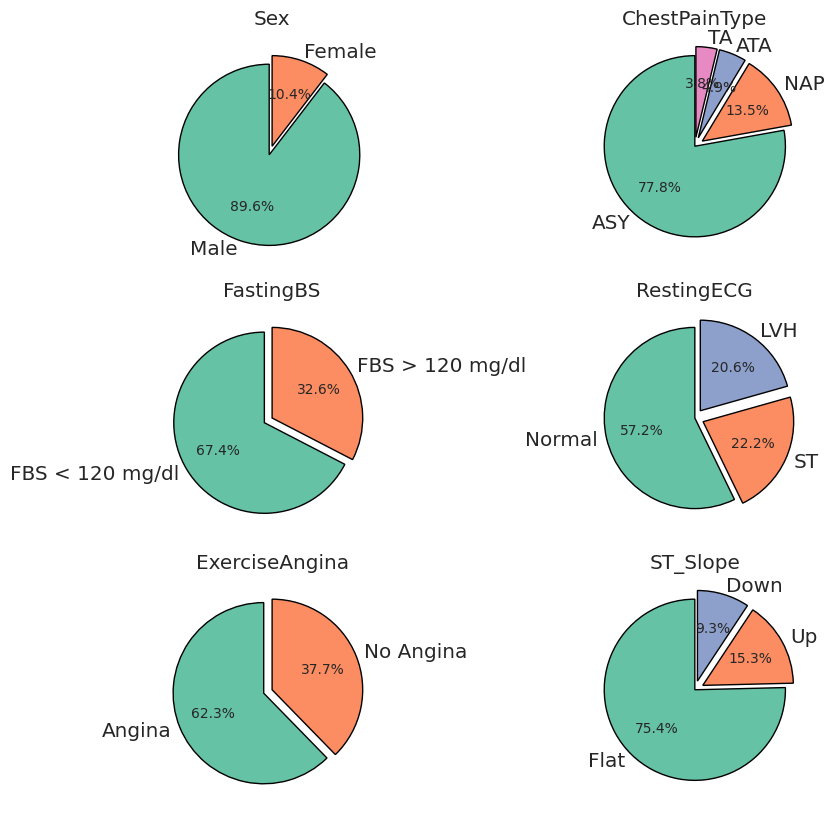

In [ ]:
palette = sns.color_palette("Set2")

colors = palette.as_hex()

ax,fig = plt.subplots(nrows = 4,ncols = 2,figsize = (10,10))

plt.subplot(3,2,1)
plt.pie(sex,labels = ['Male','Female'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Sex');

plt.subplot(3,2,2)
plt.pie(cp,labels = ['ASY', 'NAP', 'ATA', 'TA'],autopct='%1.1f%%',startangle = 90,explode = (0,0.1,0.1,0.1),colors = colors,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('ChestPainType');

plt.subplot(3,2,3)
plt.pie(fbs,labels = ['FBS < 120 mg/dl','FBS > 120 mg/dl'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('FastingBS');

plt.subplot(3,2,4)
plt.pie(restecg,labels = ['Normal','ST','LVH'],autopct='%1.1f%%',startangle = 90,explode = (0,0.1,0.1),colors = colors,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('RestingECG');

plt.subplot(3,2,5)
plt.pie(exang,labels = ['Angina','No Angina'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('ExerciseAngina');

plt.subplot(3,2,6)
plt.pie(slope,labels = ['Flat','Up','Down'],autopct='%1.1f%%',startangle = 90,explode = (0,0.1,0.1),colors = colors,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('ST_Slope');

# Feature Engineering

In [ ]:
#Using CHi-Squared Test statistics to understand the statistical importance of the features

from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Categorical variables need to represented with numbers for sklearn's chi2 function
df_chi = heart_db.apply(label_encoder.fit_transform)

X_cat = df_chi[non_numeric]
y = heart_db['HeartDisease']
chi_scores, p_values = chi2(X_cat, y)
chi_results_df = pd.DataFrame({'Feature': non_numeric, 'Chi-Squared Stat': chi_scores, 'p-value': p_values})
chi_results_df = chi_results_df.sort_values(by='Chi-Squared Stat', ascending=False)

print(chi_results_df)

          Feature  Chi-Squared Stat       p-value
1   ChestPainType        144.402435  2.901384e-33
3  ExerciseAngina        125.875354  3.274159e-29
4        ST_Slope         72.882201  1.376237e-17
0             Sex         14.703066  1.258416e-04
2      RestingECG          0.455493  4.997377e-01


From the stats, we can see thatRestingECG, with a Chi-Squared Statistic of 1.2 and a p-value of 0.2697, does not indicate a statistically significant association with the target variable.

Sex displays a Chi-Squared Statistic of 18 with a p-value of 2.20e-05, signifying a statistically significant association with the target variable, albeit less pronounced than the aforementioned features.

FastingBS demonstrates a significant Chi-Squared Statistic of 50.296983 and a p-value of 1.32e-12, implying a relevant albeit slightly weaker association compared to ChestPainType and ExerciseAngina.

ST_Slope shows a considerable Chi-Squared Statistic of 77 and a low p-value (1.34e-18), indicating a noteworthy association with the target variable.

ExerciseAngina also exhibits a strong relationship with the target variable, evidenced by its high Chi-Squared Statistic of 133 and a p-value of 6.55e-31. This underscores its significant predictive relevance.

ChestPainType stands out with the highest Chi-Squared Statistic of 160 and an extremely low p-value (7.81e-37), showcasing a robust association with the target variable. It likely holds the most predictive power among the features analyzed.

# Data Encoding

- cp: chest pain type
    - 0: typical angina
    - 1: atypical angina
    - 2: non-anginal pain
    - 3: asymptomatic
- restecg: resting electrocardiographic results
    - 0: normal
    - 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
- slope: the slope of the peak exercise ST segment
    - 0: upsloping
    - 1: flat
    - 2: downsloping
- thal:
    - 0 = normal
    - 1 = fixed defect
    - 2 = reversible defect

In [ ]:
# Displaying the unique values for each column to see if there are NAN or ? values
for column in heart_db.columns:
    unique_values = heart_db[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")

Unique values in column 'Age': [40 49 37 48 54 39 45 58 42 38 43 60 36 44 53 52 51 56 41 32 65 35 59 50
 47 31 46 57 55 63 34 33 61 29 62 28 30 64]
Unique values in column 'Sex': ['M' 'F']
Unique values in column 'ChestPainType': ['ATA' 'NAP' 'ASY' 'TA']
Unique values in column 'RestingBP': [140 160 130 138 150 120 110 136 115 100 124 113 125 145 112 132 118 170
 142 180 135 108 155 128 106  95 122  98 105 133 165 126 152 116 144 154
 134 104 139 131 141 178 137 146 158 123 102  96 143 172 156 114 127 101
 174 148 117 129 164]
Unique values in column 'Cholesterol': [223 283 214 195 237 208 207 211 204 234 273 196 201 248 267 184 215 209
 260 188 224 186 254 250 227 230 264 259 216 233 205 245 194 270 213 253
 277 202 225 246 265 218 268 206 238 263 229 210 269 275 241 255 276 282
 272 240 228 247 243 279 198 249 190 185 212 231 222 235 187 266 251 280
 192 193 219 257 226 217 256 281 200 271 274 221 220 242 236 203 252 258
 197 232 244 261 239 199 262]
Unique values in column 'FastingB

In [ ]:
heart_db

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,223,0,Normal,172.0,N,0.0,Up,0
1,49,F,NAP,160,223,0,Normal,156.0,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98.0,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108.0,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122.0,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
831,57,F,ASY,140,241,0,Normal,123.0,Y,0.2,Flat,1
832,45,M,TA,110,264,0,Normal,132.0,N,1.2,Flat,1
833,57,M,ASY,130,223,0,Normal,115.0,Y,1.2,Flat,1
834,57,F,ATA,130,236,0,LVH,174.0,N,0.0,Flat,1


In [ ]:
# Figuring the binary columns for imputation

# Identify binary columns

binary_cols = [col for col in heart_db.columns if heart_db[col].nunique() == 2]

# Print the binary columns

print("Binary columns:", binary_cols)

Binary columns: ['Sex', 'FastingBS', 'ExerciseAngina', 'HeartDisease']


In [ ]:
# Get unique features of the binary columns

for col in binary_cols:
    unique_features = heart_db[col].unique()
    print(f"Unique features for column {col}: {unique_features}")

Unique features for column Sex: ['M' 'F']
Unique features for column FastingBS: [0 1]
Unique features for column ExerciseAngina: ['N' 'Y']
Unique features for column HeartDisease: [0 1]


In [ ]:
# Using label encoder to replace the binary columns

from sklearn.preprocessing import LabelEncoder

# Initializing the LabelEncoder

le = LabelEncoder()

# Iterating over the binary columns

for col in binary_cols:

  le.fit(heart_db[col])   # Fit the encoder to the column data

  heart_db[col] = le.transform(heart_db[col])   # Transform the column data using the encoder

# Print the transformed data

heart_db

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,223,0,Normal,172.0,0,0.0,Up,0
1,49,0,NAP,160,223,0,Normal,156.0,0,1.0,Flat,1
2,37,1,ATA,130,283,0,ST,98.0,0,0.0,Up,0
3,48,0,ASY,138,214,0,Normal,108.0,1,1.5,Flat,1
4,54,1,NAP,150,195,0,Normal,122.0,0,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
831,57,0,ASY,140,241,0,Normal,123.0,1,0.2,Flat,1
832,45,1,TA,110,264,0,Normal,132.0,0,1.2,Flat,1
833,57,1,ASY,130,223,0,Normal,115.0,1,1.2,Flat,1
834,57,0,ATA,130,236,0,LVH,174.0,0,0.0,Flat,1


In [ ]:
# checking non_numeric features

non_numeric = heart_db.select_dtypes(include='object').columns
non_numeric

Index(['ChestPainType', 'RestingECG', 'ST_Slope'], dtype='object')

In [ ]:
heart_db

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,223,0,Normal,172.0,0,0.0,Up,0
1,49,0,NAP,160,223,0,Normal,156.0,0,1.0,Flat,1
2,37,1,ATA,130,283,0,ST,98.0,0,0.0,Up,0
3,48,0,ASY,138,214,0,Normal,108.0,1,1.5,Flat,1
4,54,1,NAP,150,195,0,Normal,122.0,0,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
831,57,0,ASY,140,241,0,Normal,123.0,1,0.2,Flat,1
832,45,1,TA,110,264,0,Normal,132.0,0,1.2,Flat,1
833,57,1,ASY,130,223,0,Normal,115.0,1,1.2,Flat,1
834,57,0,ATA,130,236,0,LVH,174.0,0,0.0,Flat,1


In [ ]:
# dummies to replace the non_numeric features

# Create a dictionary to store the mapping between unique values and their corresponding numerical representations
mapping = {}

# Iterate over the non-numeric columns
for col in non_numeric:
  # Get the unique values for the current column
  unique_values = heart_db[col].unique()

  # Create a mapping for the current column
  column_mapping = {}
  for i, value in enumerate(unique_values):
    column_mapping[value] = i

  # Add the mapping to the dictionary
  mapping[col] = column_mapping

# Replace the non-numeric values with their corresponding numerical representations
for col in non_numeric:
  heart_db[col] = heart_db[col].map(mapping[col])

# Print the transformed DataFrame
heart_db


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,0,140,223,0,0,172.0,0,0.0,0,0
1,49,0,1,160,223,0,0,156.0,0,1.0,1,1
2,37,1,0,130,283,0,1,98.0,0,0.0,0,0
3,48,0,2,138,214,0,0,108.0,1,1.5,1,1
4,54,1,1,150,195,0,0,122.0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
831,57,0,2,140,241,0,0,123.0,1,0.2,1,1
832,45,1,3,110,264,0,0,132.0,0,1.2,1,1
833,57,1,2,130,223,0,0,115.0,1,1.2,1,1
834,57,0,0,130,236,0,2,174.0,0,0.0,1,1


## Splitting the dependent and independent (Target) variable(s)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.svm import SVC


In [ ]:
#Splitting the Features and Target
X = heart_db.drop(columns = "HeartDisease", axis=1)
y = heart_db["HeartDisease"]

# Assuming X and y are the features and labels
X_encoded = pd.get_dummies(X)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, stratify=y, random_state=42)

# standadizing the features
scaler = StandardScaler()

# Scale the features
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
X_train.shape


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



(668, 18)

In [ ]:
X_test.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



(168, 18)

# MODEL BUILDING

# Logistic Regression

In [ ]:
from sklearn.metrics import classification_report

m1 = "Logistic Regression"
lr_model = LogisticRegression(solver="liblinear", random_state=2)
# training the model with training data
lr_model.fit(X_train, y_train)

# Accuracy on training data
X_train_prediction = lr_model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)
print(f"Accuracy on Training data: ", training_data_accuracy * 100)

# Accuracy on test data
X_test_prediction = lr_model.predict(X_test)
test_data_accuracy_lr = accuracy_score(X_test_prediction, y_test)
print(f"Accuracy on Test data: ", test_data_accuracy_lr * 100)

# Confusion matrix
LR_conf_matrix = confusion_matrix(y_test, X_test_prediction)
print("Confusion matrix:")
print(LR_conf_matrix)

# Precision, recall, f1-score, and support
print("Classification Report:")
print(classification_report(y_test, X_test_prediction))


Accuracy on Training data:  85.47904191616766
Accuracy on Test data:  86.90476190476191
Confusion matrix:
[[66 11]
 [11 80]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        77
           1       0.88      0.88      0.88        91

    accuracy                           0.87       168
   macro avg       0.87      0.87      0.87       168
weighted avg       0.87      0.87      0.87       168



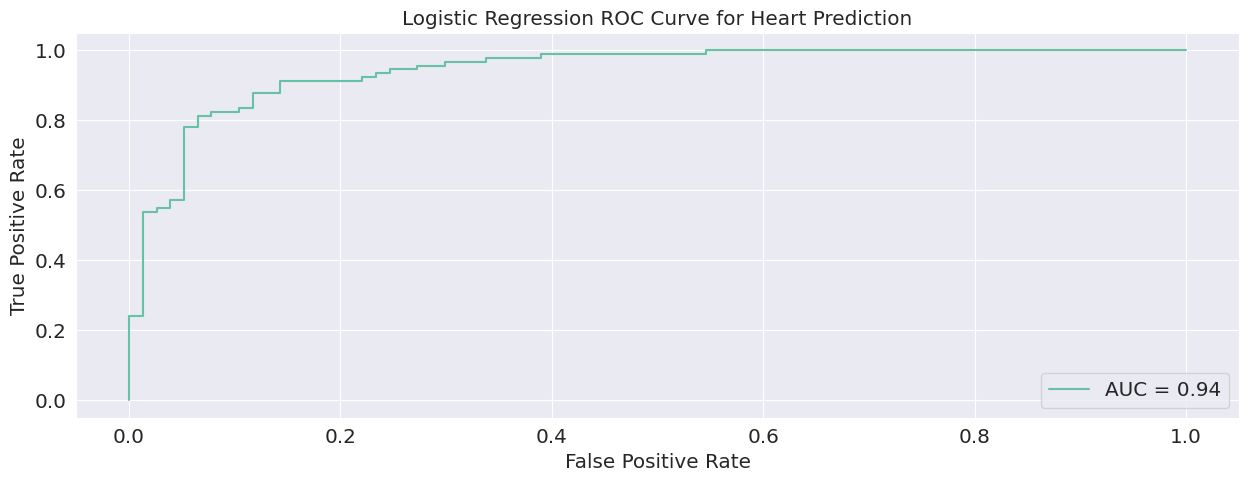

In [ ]:
# ROC Curve
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

# Get predicted probabilities for the test set
ptest = lr_model.predict_proba(X_test)[:,1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, ptest)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()

# Add labels and title
plt.title('Logistic Regression ROC Curve for Heart Prediction')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
# AUC

print("AUC:", roc_auc)


AUC: 0.9422006564863707


# Naive Bayes

In [ ]:
m2 = "Naive Bayes"

nb = GaussianNB()
# training the model with training data
nb.fit(X_train, y_train)
# Accuracy on training data
X_train_prediction = nb.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)
print(f"Accuracy on Training data: {training_data_accuracy*100}")

# Accuracy on test data
X_test_prediction = nb.predict(X_test)
test_data_accuracy_nb = accuracy_score(X_test_prediction, y_test)
print(f"Accuracy on Test data: {test_data_accuracy_nb*100}")

# Confusion matrix
nb_conf_matrix = confusion_matrix(y_test, X_test_prediction)
print("Confusion matrix:")
print(nb_conf_matrix)

# Showing the precision, recall, f1-score, and support
print("Classification Report:")
print(classification_report(y_test, X_test_prediction))


Accuracy on Training data: 84.13173652694611
Accuracy on Test data: 86.90476190476191
Confusion matrix:
[[66 11]
 [11 80]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        77
           1       0.88      0.88      0.88        91

    accuracy                           0.87       168
   macro avg       0.87      0.87      0.87       168
weighted avg       0.87      0.87      0.87       168



# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
m3 = "Random Forest"

# Initialize the Random Forest classifier
rf = RandomForestClassifier()

# Training the model with training data
rf.fit(X_train, y_train)

# Accuracy on training data
X_train_prediction = rf.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)
print(f"Accuracy on Training data: {training_data_accuracy*100}")

# Accuracy on test data
X_test_prediction = rf.predict(X_test)
test_data_accuracy_rf = accuracy_score(X_test_prediction, y_test)
print(f"Accuracy on Test data: {test_data_accuracy_rf*100}")

# Confusion matrix
rf_conf_matrix = confusion_matrix(y_test, X_test_prediction)
print("Confusion matrix:")
print(rf_conf_matrix)

# Showing the precision, recall, f1-score, and support
print("Classification Report:")
print(classification_report(y_test, X_test_prediction))


Accuracy on Training data: 100.0
Accuracy on Test data: 86.90476190476191
Confusion matrix:
[[63 14]
 [ 8 83]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.82      0.85        77
           1       0.86      0.91      0.88        91

    accuracy                           0.87       168
   macro avg       0.87      0.87      0.87       168
weighted avg       0.87      0.87      0.87       168



In [ ]:
# using the ensemble method for random forest with GridSearchCV

#from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the grid of hyperparameters to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Create the RandomForestClassifier instance
rfc = RandomForestClassifier()

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5)

# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Print the best hyperparameters
print(f"Best hyperparameters: {best_params}")

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the testing data
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report
classification_report_str = classification_report(y_test, y_pred)
print(f"Classification report:\n{classification_report_str}")


Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
Accuracy: 0.87
Classification report:
              precision    recall  f1-score   support

           0       0.89      0.82      0.85        77
           1       0.86      0.91      0.88        91

    accuracy                           0.87       168
   macro avg       0.87      0.87      0.87       168
weighted avg       0.87      0.87      0.87       168



In [ ]:
!pip install xgboost

In [ ]:
# XGBoost
m4 = "XGBoost"
from xgboost import XGBClassifier

# Create an XGBClassifier instance
xgb_model = XGBClassifier()

# Fit the model to the training data
xgb_model.fit(X_train, y_train)

# Evaluate the model on the testing data
y_pred = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report
classification_report_str = classification_report(y_test, y_pred)
print(f"Classification report:\n{classification_report_str}")


Accuracy: 0.86
Classification report:
              precision    recall  f1-score   support

           0       0.87      0.81      0.84        77
           1       0.85      0.90      0.87        91

    accuracy                           0.86       168
   macro avg       0.86      0.85      0.86       168
weighted avg       0.86      0.86      0.86       168



In [ ]:
from sklearn.svm import SVC
m5 = "SVM"
# Create an SVM classifier
svm_model = SVC(kernel='linear')

# Fit the model to the training data
svm_model.fit(X_train, y_train)

# Evaluate the model on the testing data
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report
classification_report_str = classification_report(y_test, y_pred)
print(f"Classification report:\n{classification_report_str}")


Accuracy: 0.87
Classification report:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86        77
           1       0.89      0.87      0.88        91

    accuracy                           0.87       168
   macro avg       0.87      0.87      0.87       168
weighted avg       0.87      0.87      0.87       168



DECISION TREE

In [ ]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier

# Create a decision tree classifier instance
decision_tree_model = DecisionTreeClassifier()

# Fit the model to the training data
decision_tree_model.fit(X_train, y_train)

# Evaluate the model on the testing data
y_pred = decision_tree_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report
classification_report_str = classification_report(y_test, y_pred)
print(f"Classification report:\n{classification_report_str}")


Accuracy: 0.76
Classification report:
              precision    recall  f1-score   support

           0       0.73      0.77      0.75        77
           1       0.79      0.76      0.78        91

    accuracy                           0.76       168
   macro avg       0.76      0.76      0.76       168
weighted avg       0.76      0.76      0.76       168



In [ ]:
print(heart_db['HeartDisease'].value_counts())

HeartDisease
1    451
0    385
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



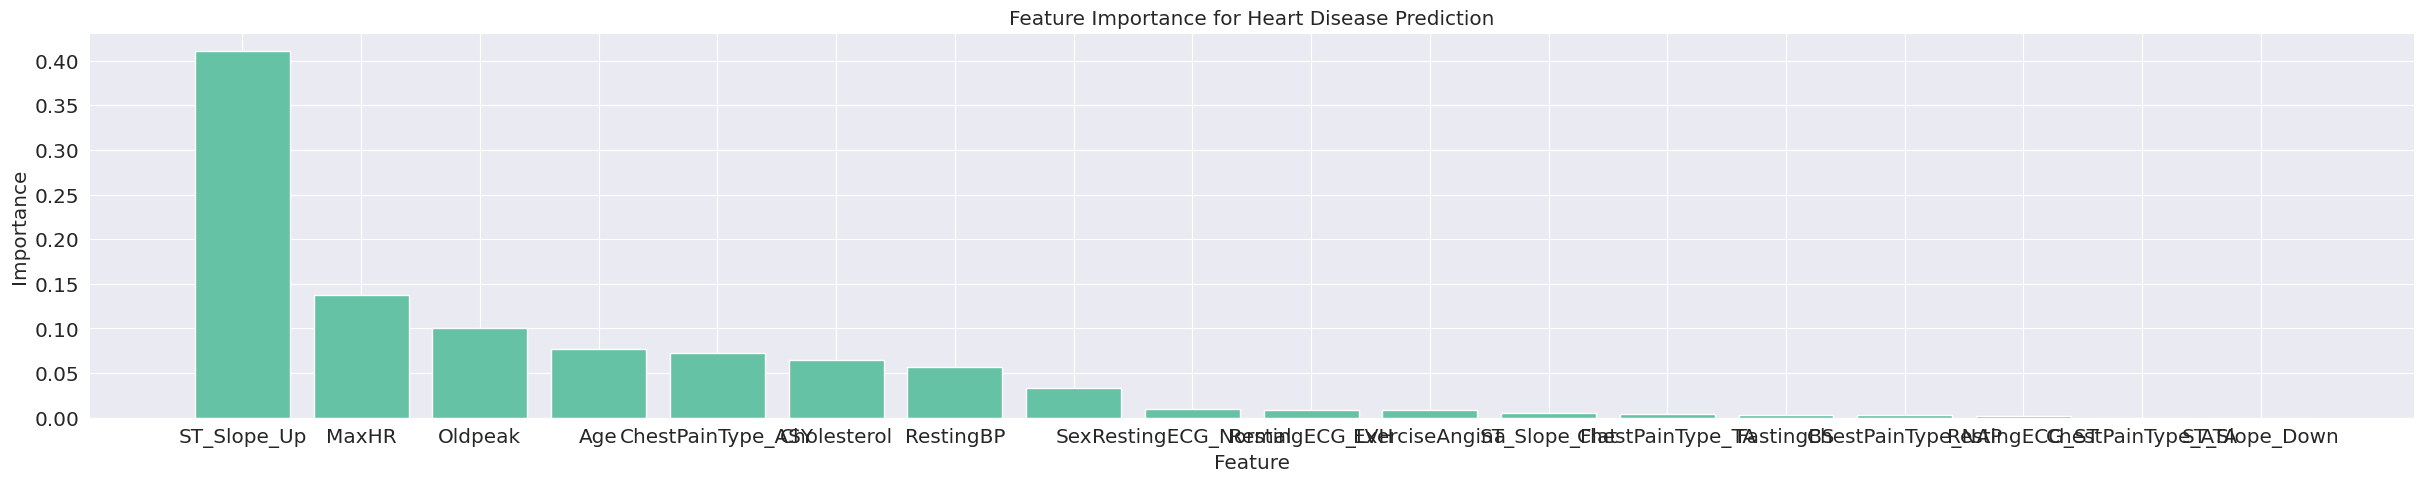

In [ ]:

importances = decision_tree_model.feature_importances_
features = X_encoded.columns

# Sort the features by importance in descending order
sorted_indices = np.argsort(-importances)
sorted_features = [features[i] for i in sorted_indices]

# Create a bar plot of the feature importances
plt.figure(figsize=(30, 5))
plt.bar(sorted_features, importances[sorted_indices], align="center")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance for Heart Disease Prediction")
plt.show()


In [ ]:
from sklearn.feature_selection import mutual_info_classif

# Convert X_train to a Pandas DataFrame
X_train_df = pd.DataFrame(X_train)

# Calculate feature importances
importances = mutual_info_classif(X_train_df, y_train)

# Sort importances and get corresponding feature names
indices = np.argsort(importances)[::-1]
features = X_train_df.columns

# Print feature importance ranking
for f in range(X_train_df.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, features[indices[f]], importances[indices[f]]))

 1) 17                             0.223863
 2) 16                             0.169118
 3) 6                              0.160684
 4) 8                              0.135567
 5) 7                              0.115289
 6) 9                              0.093014
 7) 5                              0.070705
 8) 1                              0.045210
 9) 4                              0.040900
10) 3                              0.026427
11) 0                              0.013931
12) 14                             0.008578
13) 11                             0.006550
14) 12                             0.002606
15) 13                             0.000000
16) 10                             0.000000
17) 15                             0.000000
18) 2                              0.000000


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



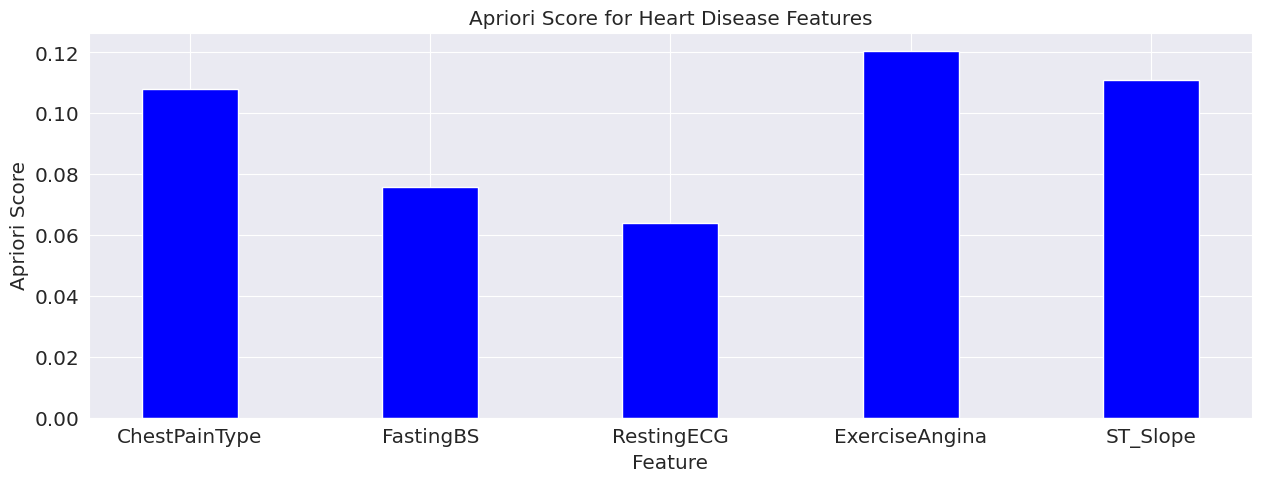

In [ ]:
import matplotlib.pyplot as plt

x = ['ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
y = [0.107837, 0.075709, 0.063846, 0.120465, 0.111004]

plt.bar(x, y, color='blue', width=0.4)
plt.xlabel("Feature")
plt.ylabel("Apriori Score")
plt.title("Apriori Score for Heart Disease Features")
plt.show()


### 4. Model Evaluation  
<hr style="border:1px solid orange"> </hr>

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf_dt = DecisionTreeClassifier()

clf_dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = clf_dt.predict(X_test)

In [ ]:
y_pred

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1], dtype=int64)

In [ ]:
y_test

821    0
748    1
797    1
396    1
486    0
      ..
276    1
197    0
454    1
77     0
418    1
Name: HeartDisease, Length: 184, dtype: int64

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.7880434782608695

In [ ]:
results = {"Models": [m1, m2, m3],
           "Accuracy": [test_data_accuracy_lr, test_data_accuracy_nb, test_data_accuracy_rf]}

for (key, value) in results.items():
    if key=="Accuracy":
        results[key]=  [item*100 for item in results[key]]


result_df=pd.DataFrame(results)
print(result_df)

                Models   Accuracy
0  Logistic Regression  86.904762
1          Naive Bayes  86.904762
2        Random Forest  86.904762


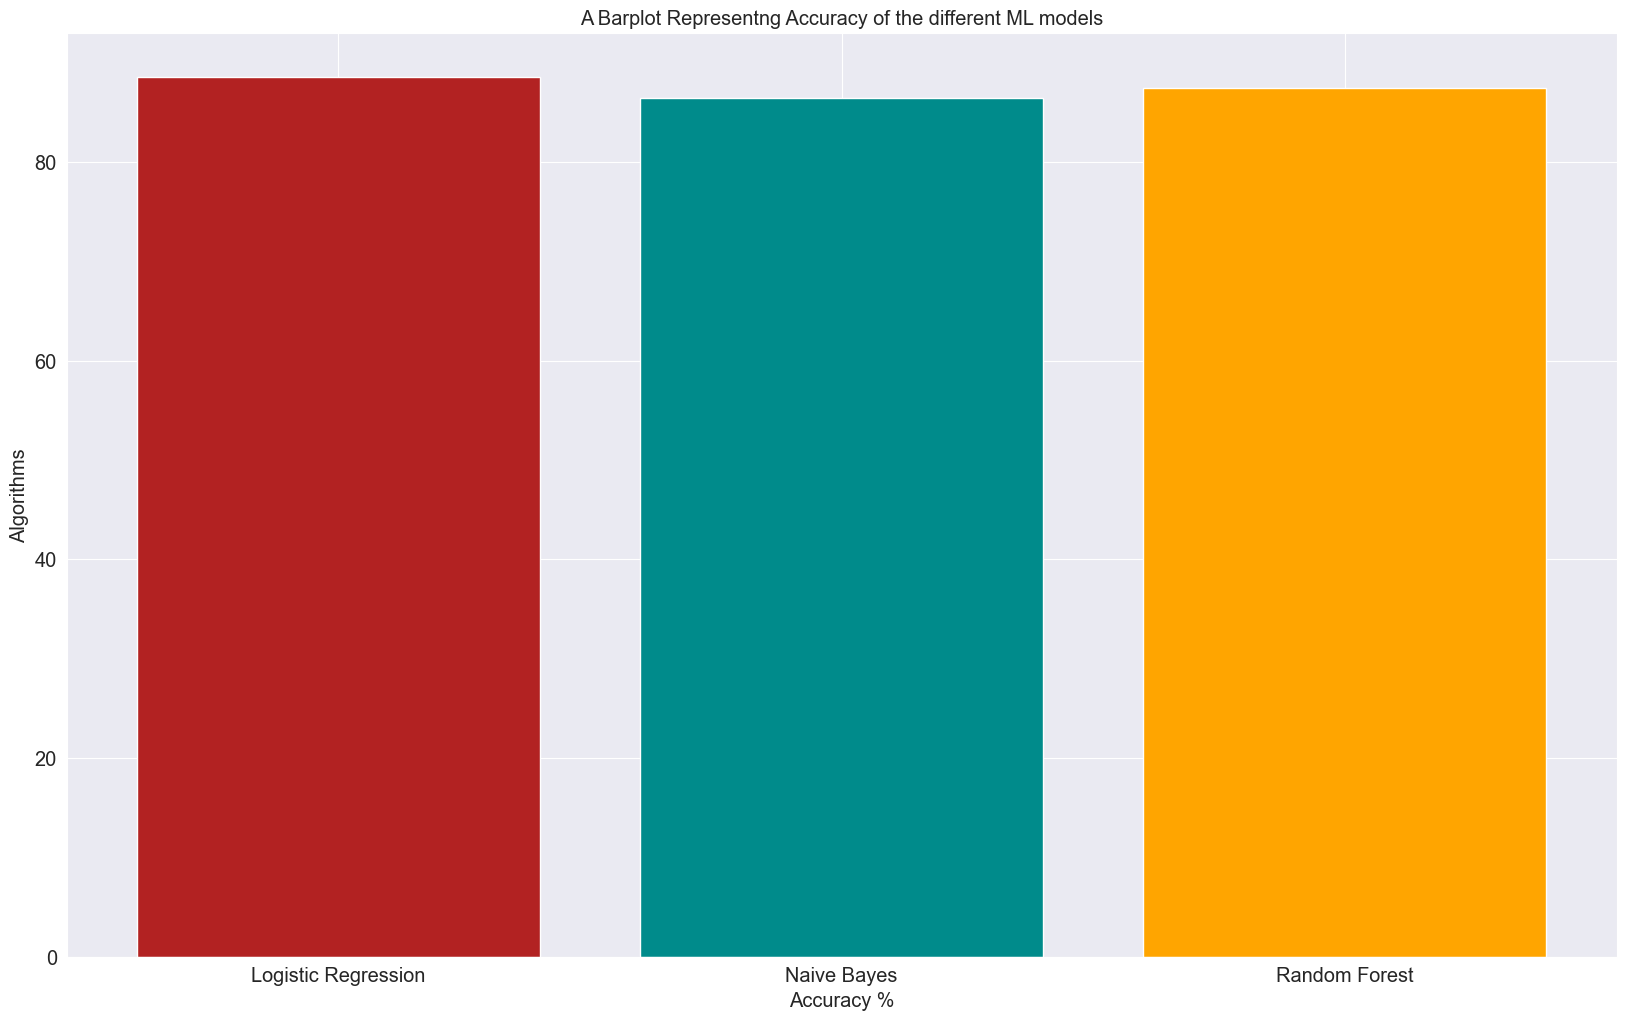

In [ ]:
colors = ['firebrick', 'darkcyan', 'orange']
plt.figure(figsize=(20,12))
plt.title("A Barplot Representng Accuracy of the different ML models")
plt.xlabel("Accuracy %")
plt.ylabel("Algorithms")
plt.bar(result_df['Models'],result_df['Accuracy'],color = colors)
plt.show()

In [ ]:
clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt = clf_dt.fit(X_train, y_train)